In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les fichiers
file_paths = {
    "yield_history": r"C:\\Users\\Probook\\OneDrive\\Bureau\\projet_agricole\\data\\historique_rendements.csv",
    "weather_data": r"C:\\Users\\Probook\\OneDrive\\Bureau\\projet_agricole\\data\\meteo_detaillee.csv",
    "monitoring_data": r"C:\\Users\\Probook\\OneDrive\\Bureau\\projet_agricole\\data\\monitoring_cultures.csv",
    "soil_data": r"C:\\Users\\Probook\\OneDrive\\Bureau\\projet_agricole\\data\\sols.csv"
}

dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}





=== Analyse pour yield_history ===

--- Description des données ---
       rendement_estime  rendement_final  progression
count       3000.000000       506.000000  3000.000000
mean           2.789077         5.671030    45.713600
std            2.650564         3.104011    35.136676
min            0.000000         2.030082     0.000000
25%            0.767500         3.076001    16.700000
50%            2.110000         4.532630    40.700000
75%            3.910000         8.216792    77.525000
max           13.450000        11.818146   100.000000

--- Valeurs négatives ---
Pas de valeurs négatives trouvées.

--- Valeurs manquantes ---
rendement_final    2494
dtype: int64

--- Génération des boxplots ---


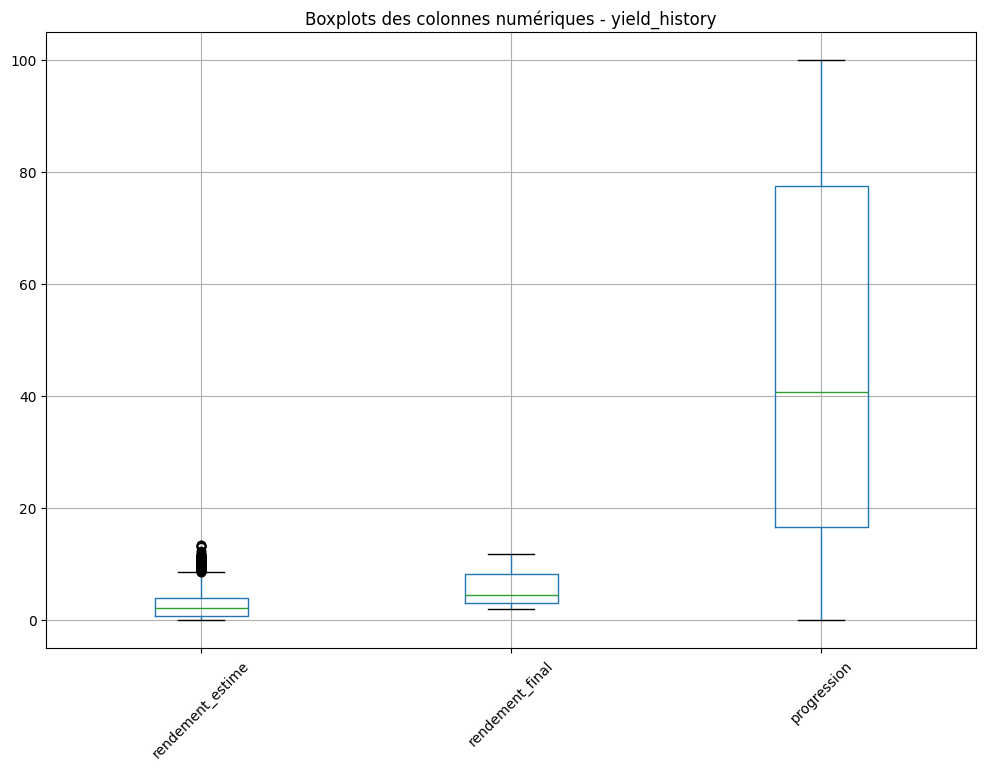


--- Graphiques de distribution ---


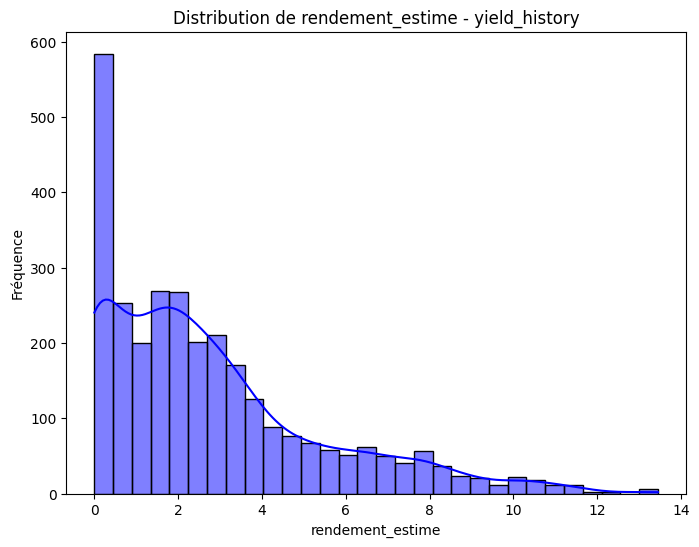

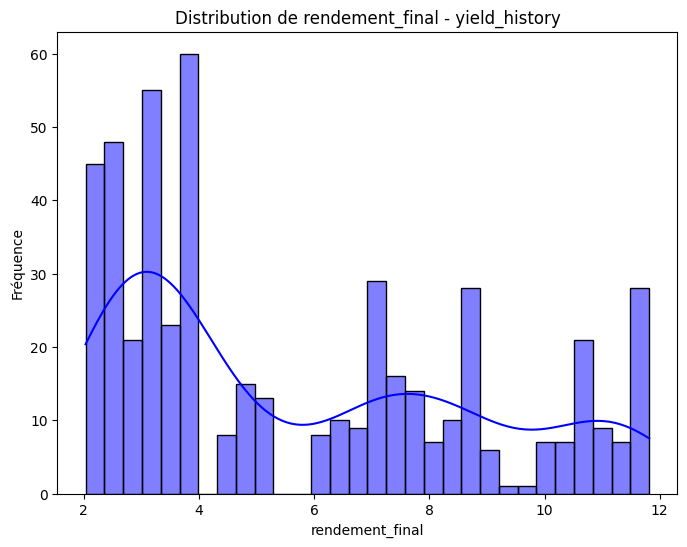

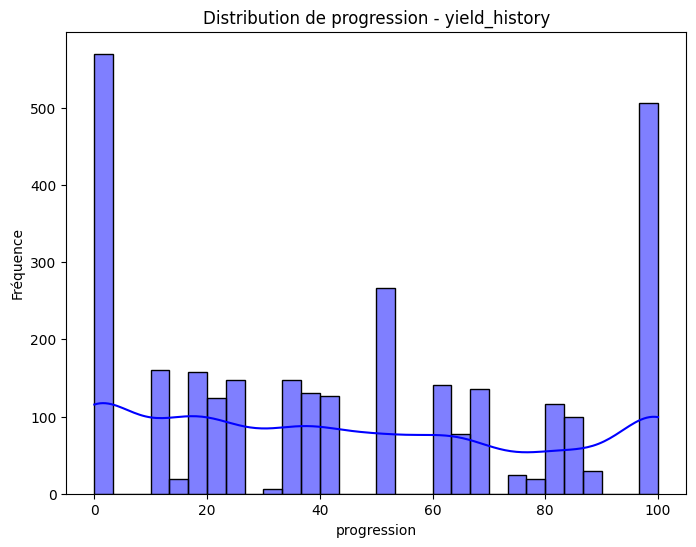


--- Matrice de corrélation ---


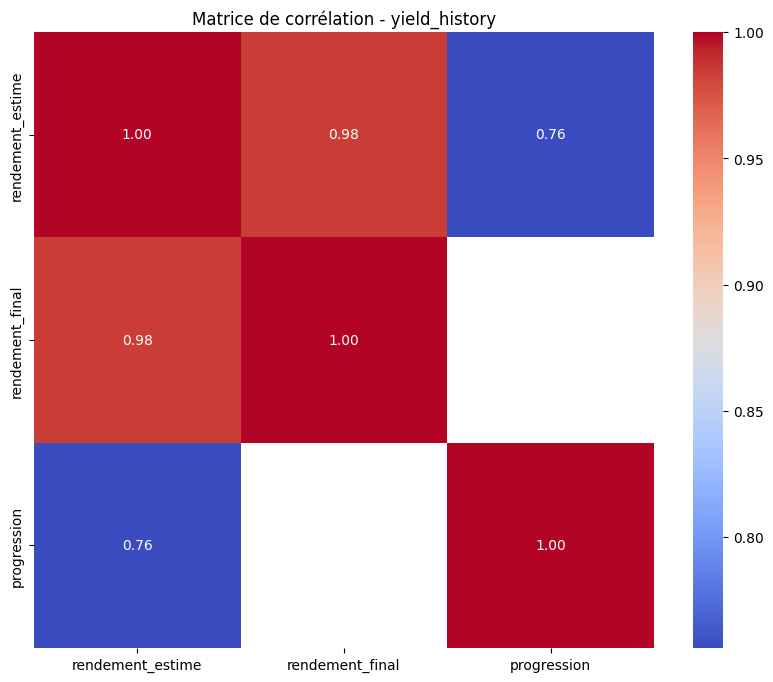


=== Analyse pour weather_data ===

--- Description des données ---
        temperature      humidite  precipitation  rayonnement_solaire  \
count  43848.000000  43848.000000   43848.000000         43848.000000   
mean      14.986754     88.191666       0.201446           189.355970   
std        7.972472      7.090408       0.871931           249.322674   
min       -2.330000     59.800000       0.000000             0.000000   
25%        8.700000     83.150000       0.000000             0.000000   
50%       14.970000     90.050000       0.000000             0.000000   
75%       21.250000     95.000000       0.000000           353.540000   
max       33.250000     95.000000      15.310000          1041.010000   

       vitesse_vent  direction_vent  
count  43848.000000    43848.000000  
mean       5.017230      180.251311  
std        1.978351      104.047102  
min        0.000000        0.000000  
25%        3.700000       89.500000  
50%        5.000000      180.200000  
75%     

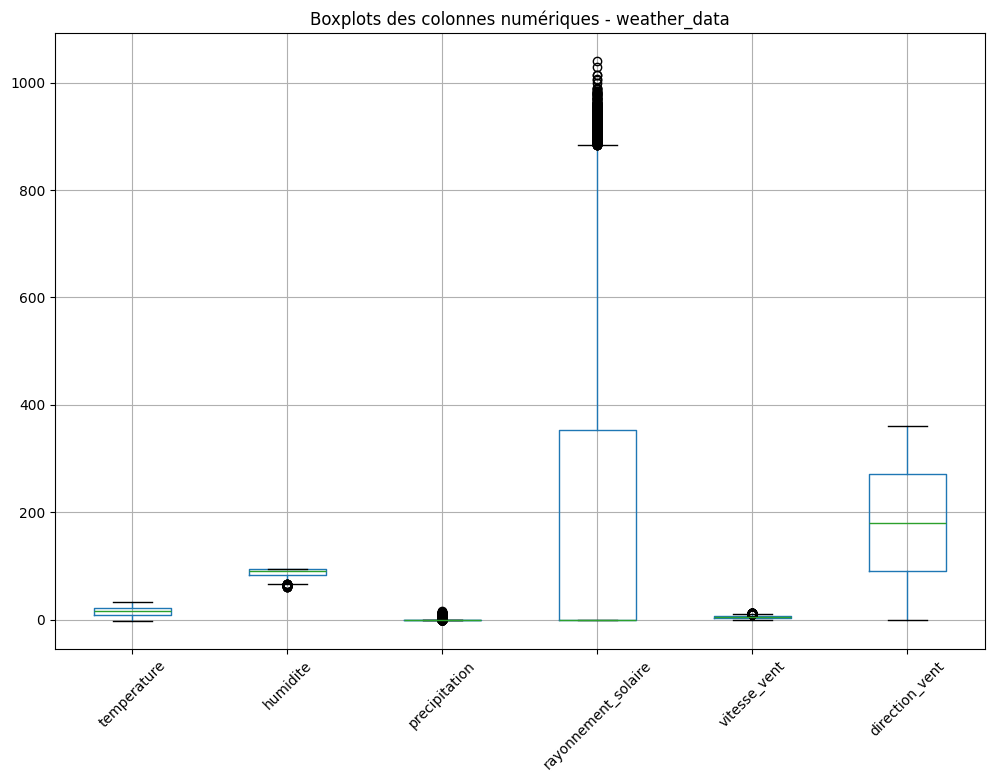


--- Graphiques de distribution ---


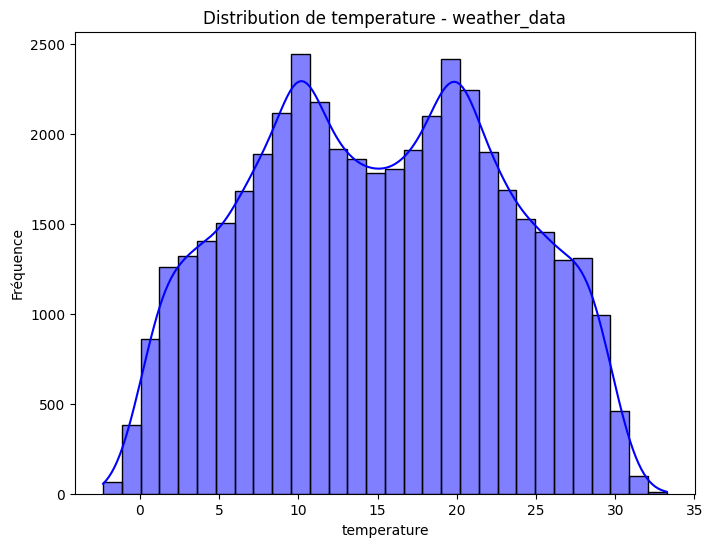

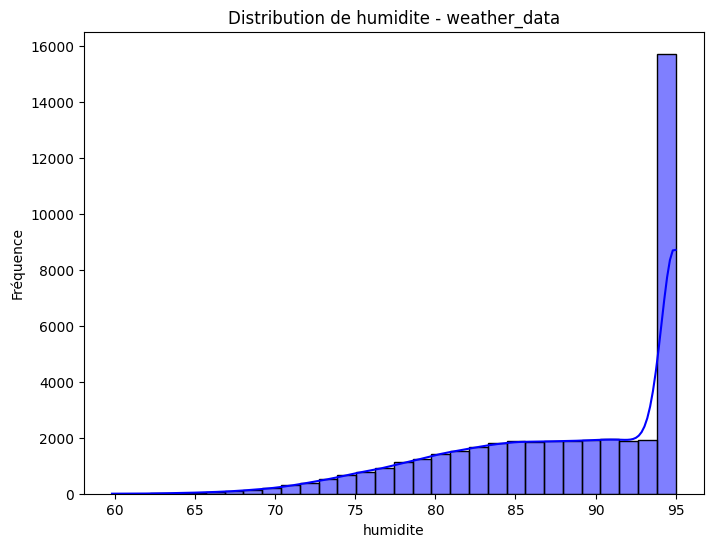

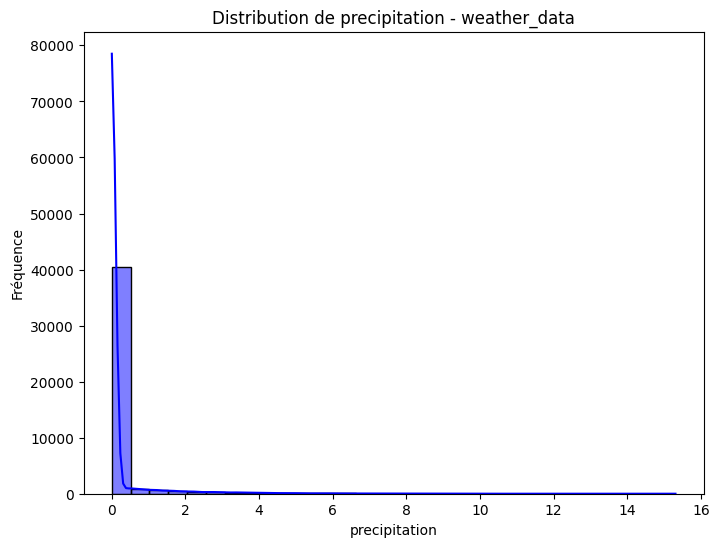

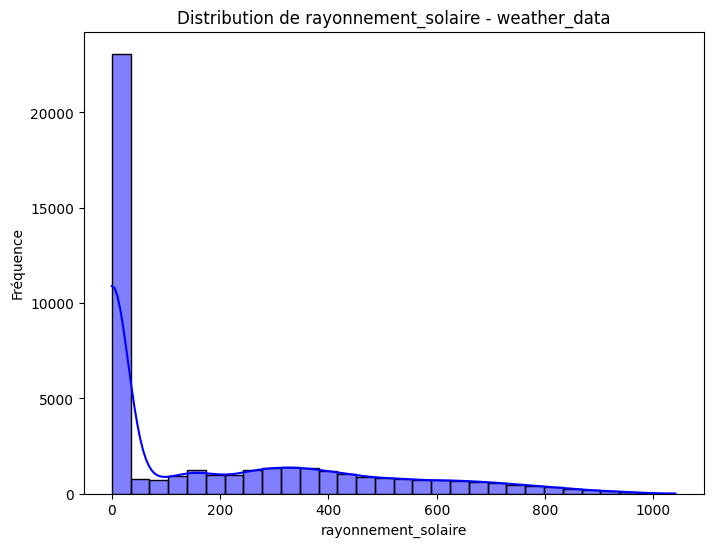

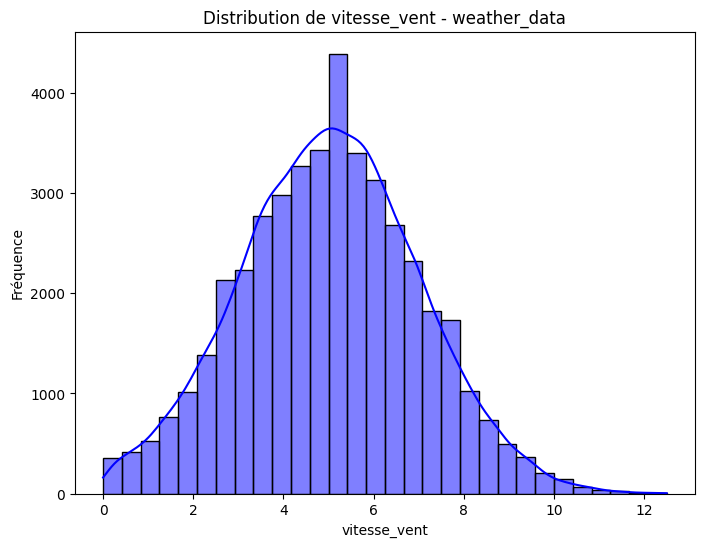

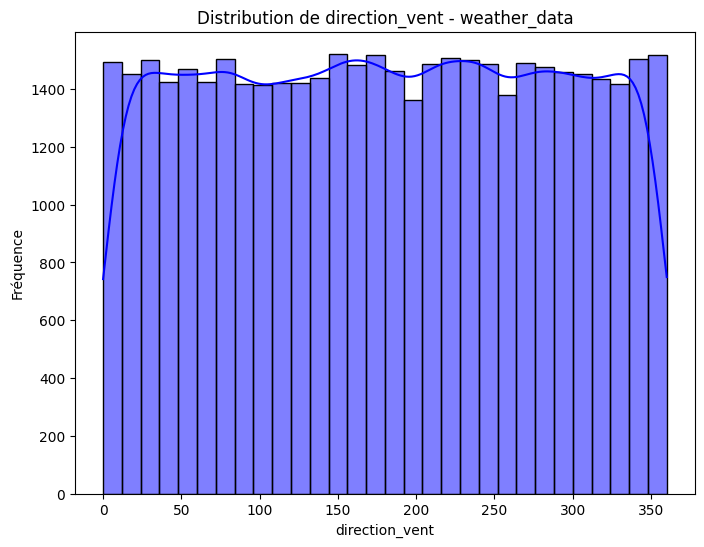


--- Matrice de corrélation ---


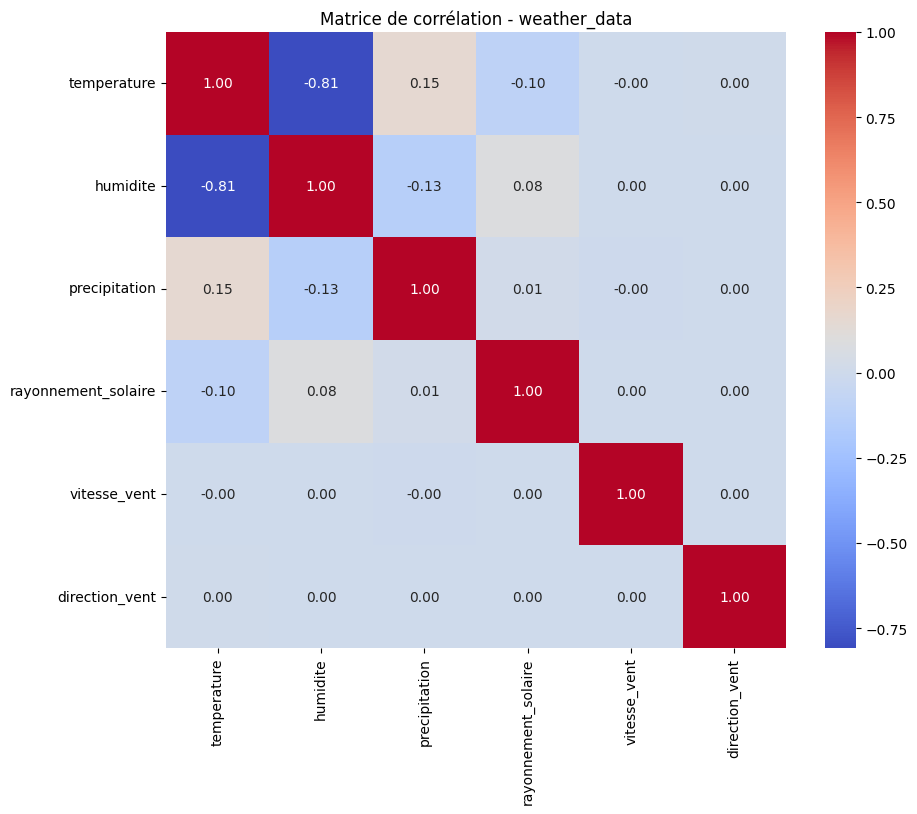


=== Analyse pour monitoring_data ===

--- Description des données ---
           latitude     longitude          ndvi           lai  \
count  91350.000000  91350.000000  91350.000000  91350.000000   
mean      33.871293     -5.543901      0.485825      1.992503   
std        0.034216      0.027453      0.183708      1.492464   
min       33.842650     -5.593781      0.100000      0.100000   
25%       33.850267     -5.551448      0.345000      0.580000   
50%       33.854988     -5.539713      0.458000      1.680000   
75%       33.859141     -5.517606      0.606000      3.070000   
max       33.937407     -5.508548      1.000000      6.550000   

       stress_hydrique  biomasse_estimee  
count     91350.000000      91350.000000  
mean          0.078592         12.257617  
std           0.068074         12.776887  
min           0.000000          0.000000  
25%           0.032000          2.040000  
50%           0.059000          7.670000  
75%           0.104000         18.280000  

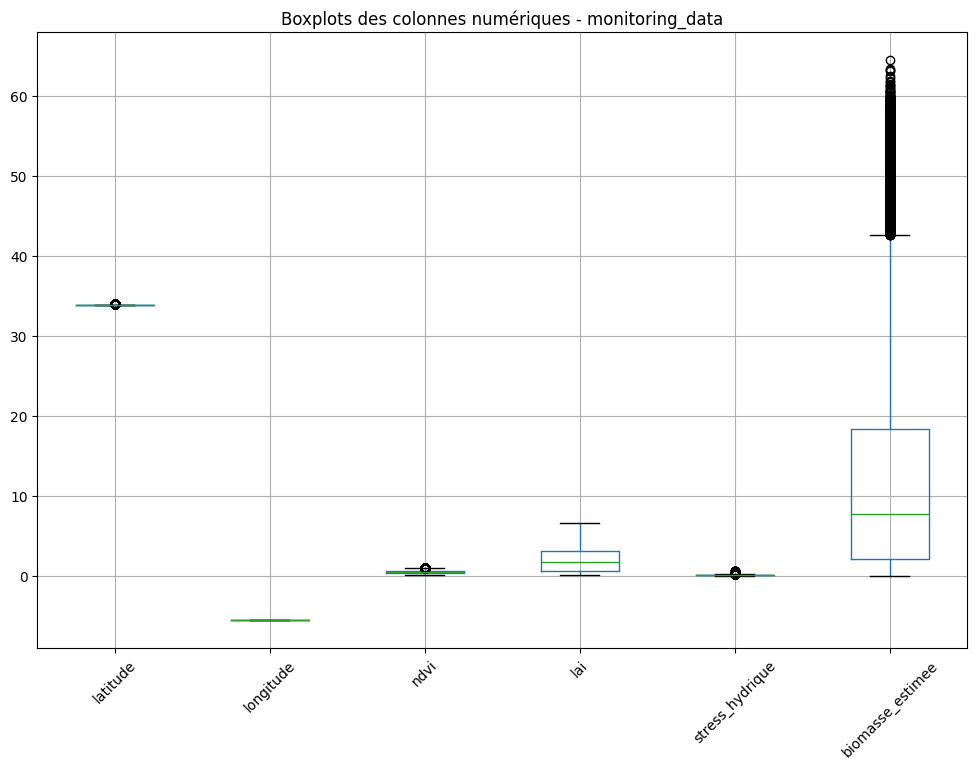


--- Graphiques de distribution ---


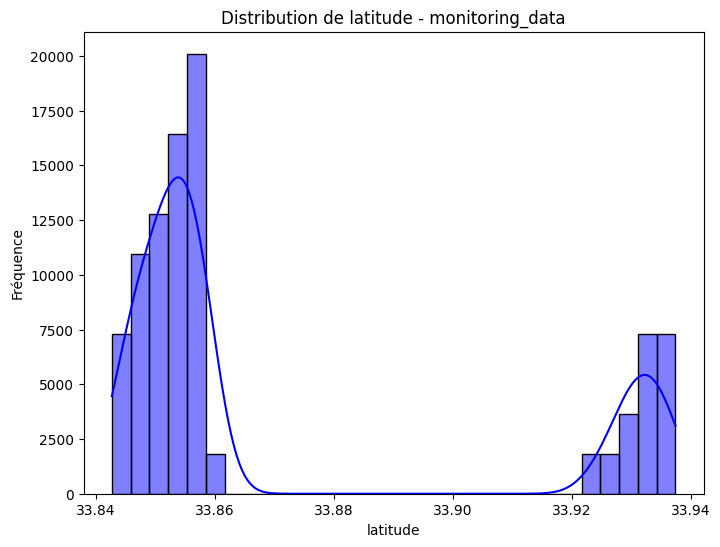

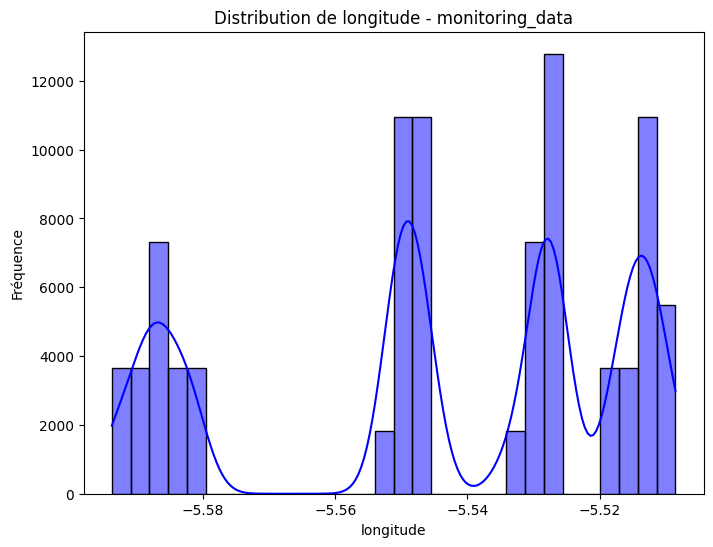

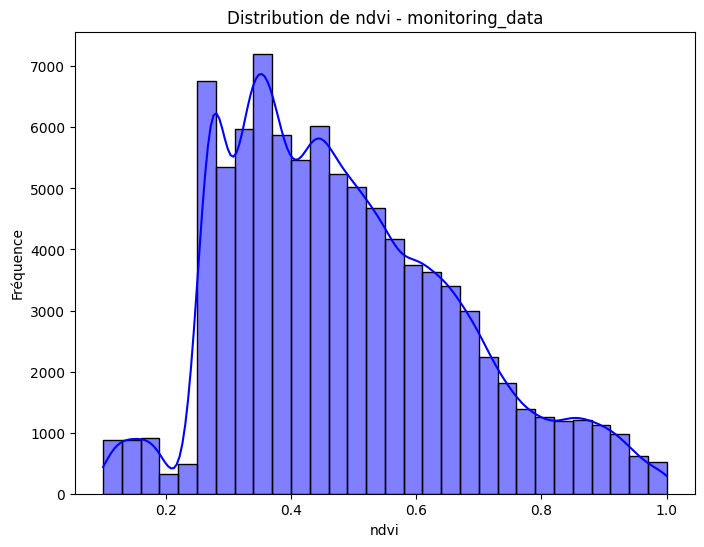

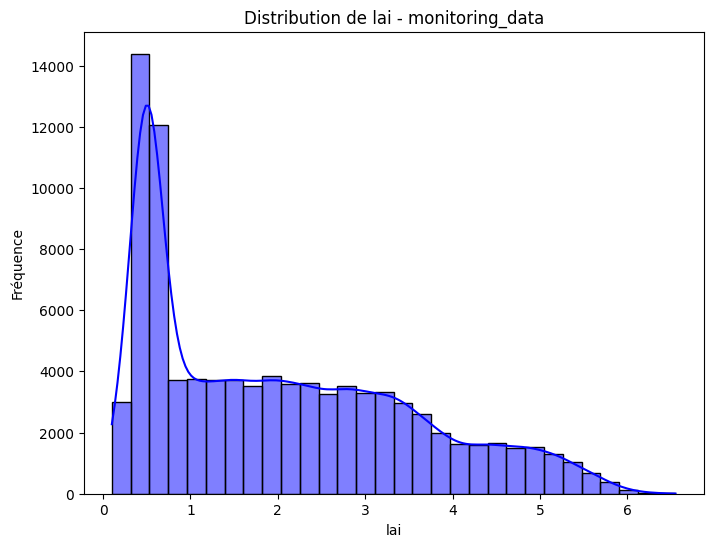

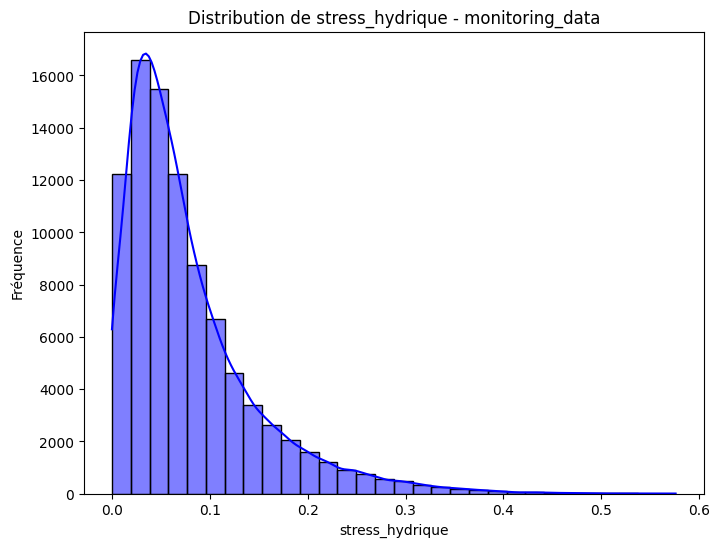

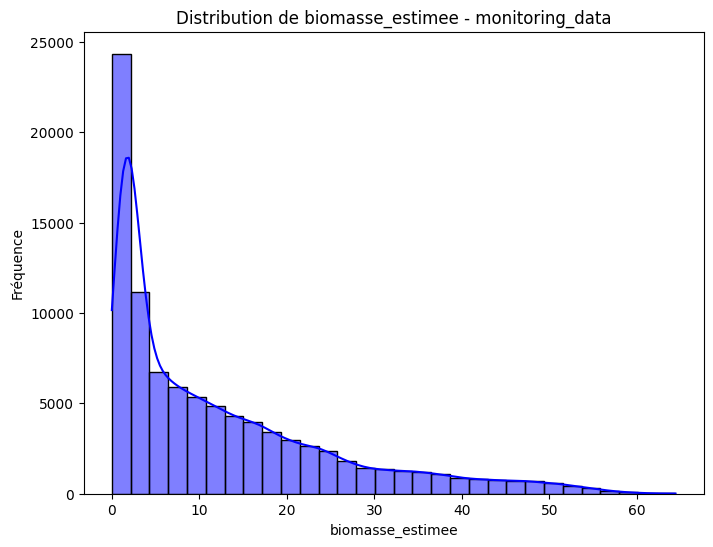


--- Matrice de corrélation ---


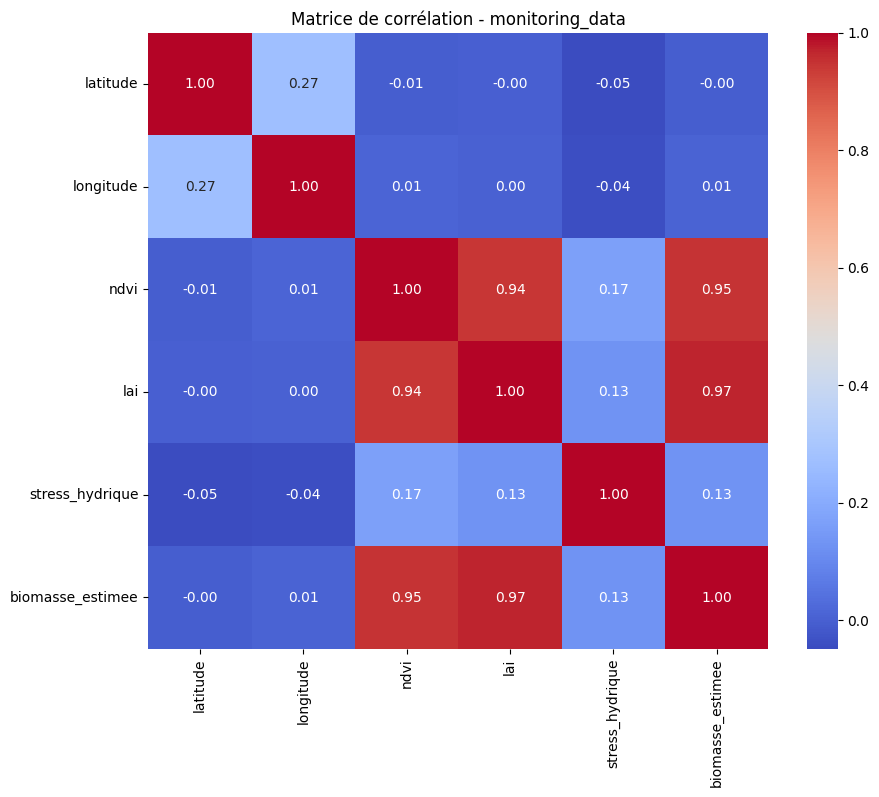


=== Analyse pour soil_data ===

--- Description des données ---
        latitude  longitude  surface_ha  capacite_retention_eau         ph  \
count  50.000000  50.000000   50.000000               50.000000  50.000000   
mean   33.871293  -5.543901   12.800600                0.716400   7.100000   
std     0.034563   0.027731    4.292493                0.148155   0.543233   
min    33.842650  -5.593781    5.070000                0.410000   6.000000   
25%    33.850452  -5.551373    9.045000                0.560000   6.700000   
50%    33.854988  -5.539713   13.705000                0.765000   7.150000   
75%    33.858922  -5.519616   16.090000                0.830000   7.500000   
max    33.937407  -5.508548   19.720000                0.890000   8.000000   

       matiere_organique      azote  phosphore   potassium  
count          50.000000  50.000000  50.000000   50.000000  
mean            3.204200   0.204120  40.030000  251.808000  
std             0.669036   0.041551  10.690588   

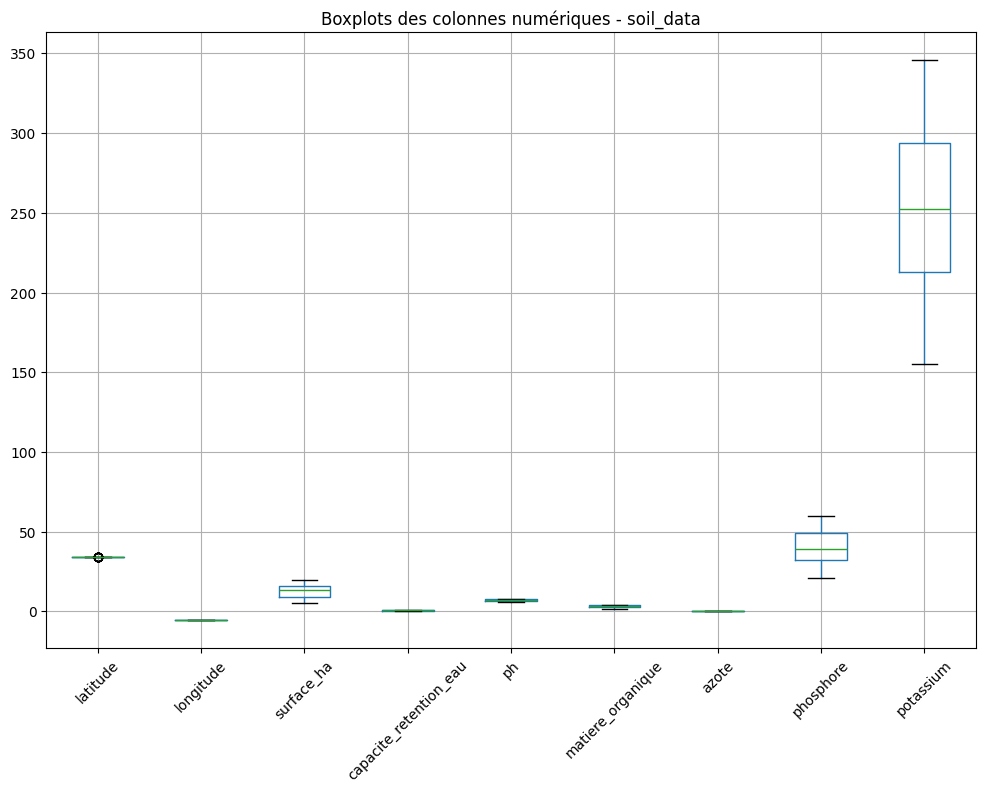


--- Graphiques de distribution ---


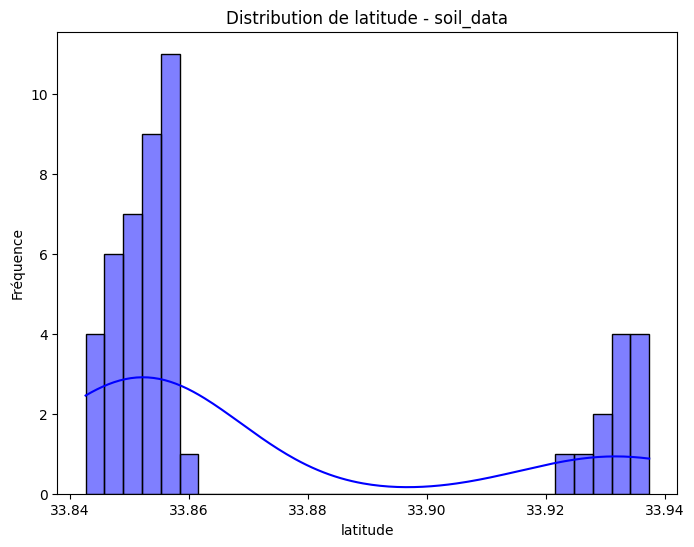

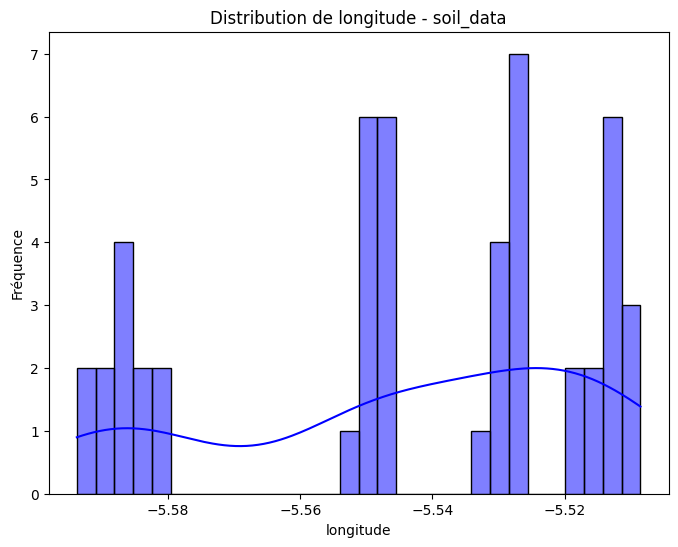

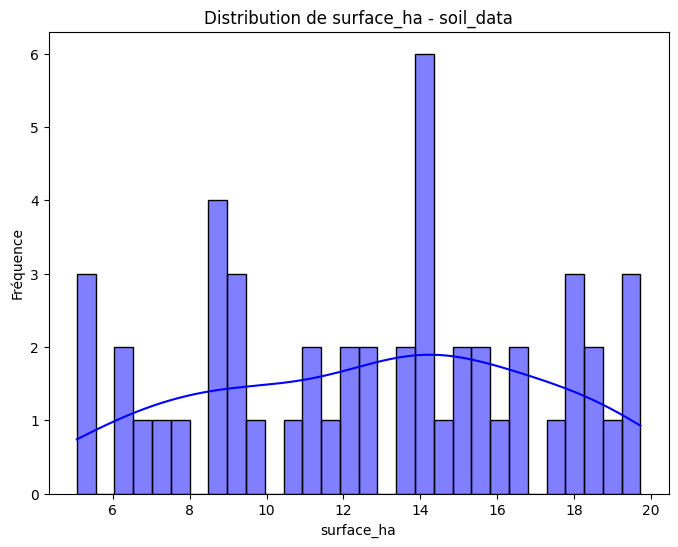

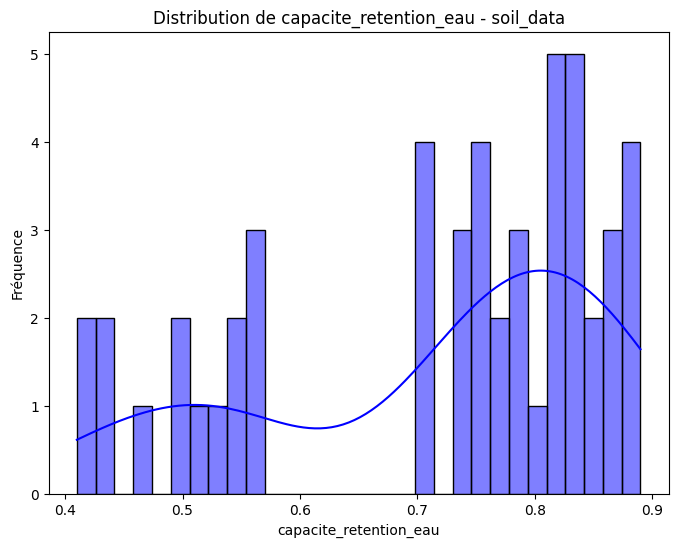

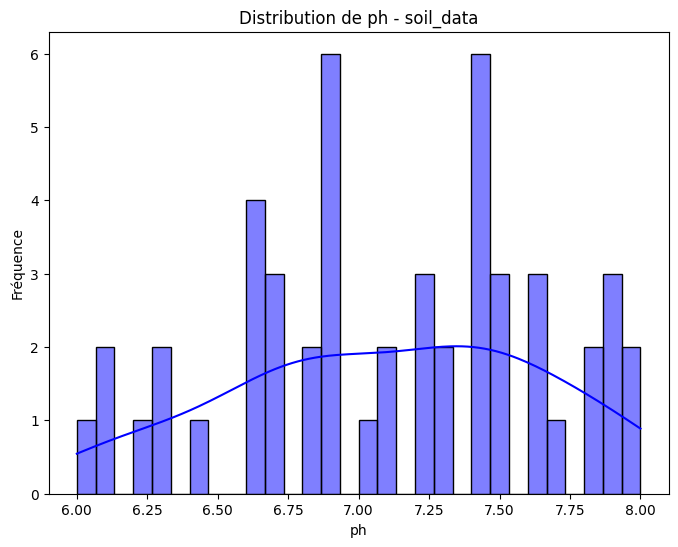

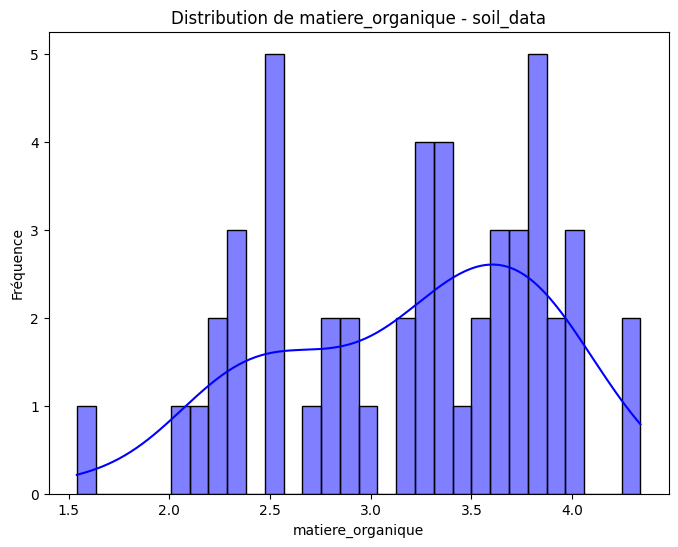

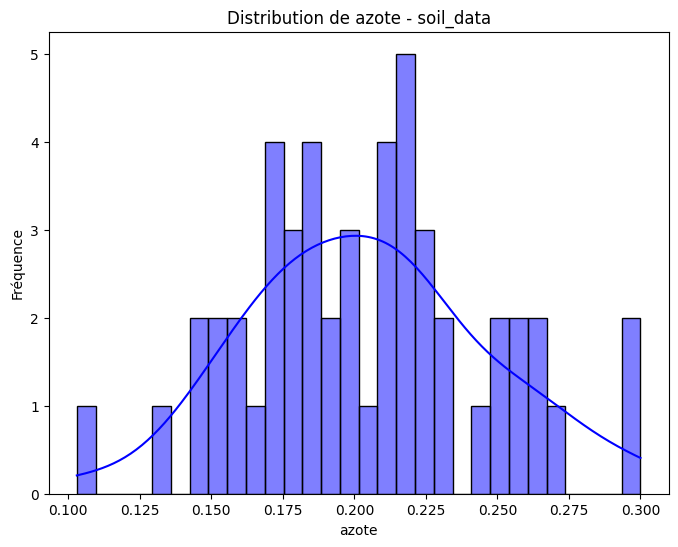

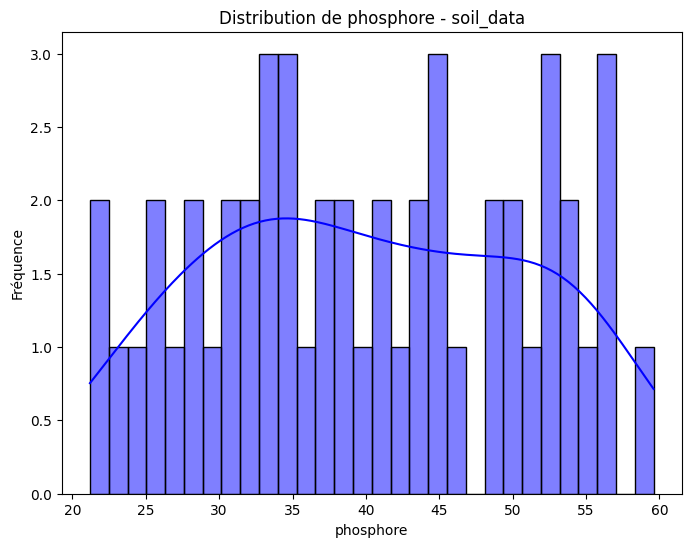

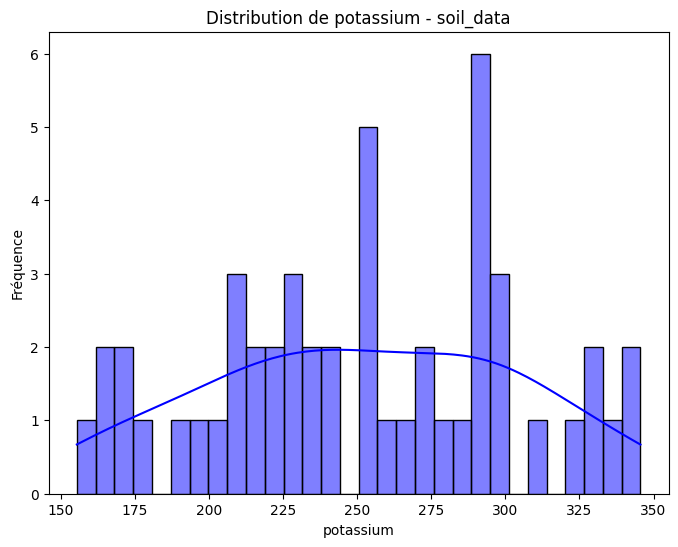


--- Matrice de corrélation ---


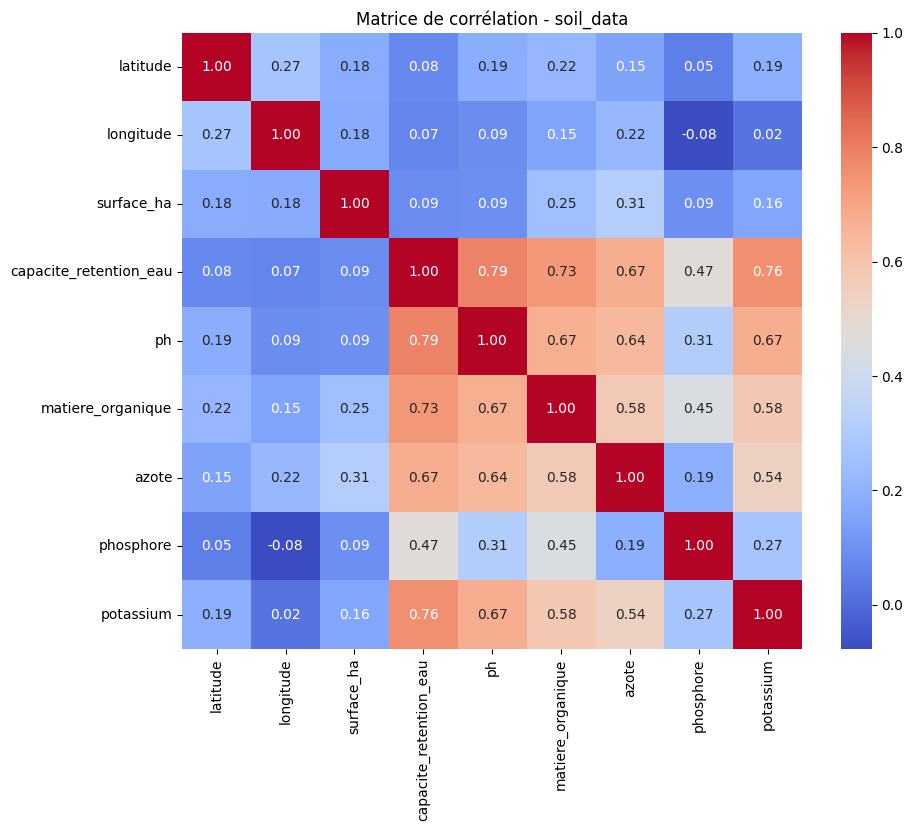

In [15]:
# afficher les valeurs négatives, les valeurs manquantes, describe(), les boxplots, les distributions et les matrices de corrélation
def analyze_and_visualize(df_dict):
    for name, df in df_dict.items():
        print(f"\n=== Analyse pour {name} ===")

        # Afficher le describe
        print("\n--- Description des données ---")
        print(df.describe())

        # Trouver et afficher les valeurs négatives
        print("\n--- Valeurs négatives ---")
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        negative_values = df[numeric_cols][df[numeric_cols] < 0].dropna(how='all')
        if not negative_values.empty:
            print(negative_values)
        else:
            print("Pas de valeurs négatives trouvées.")

        # Trouver et afficher les valeurs manquantes
        print("\n--- Valeurs manquantes ---")
        missing_values = df.isnull().sum()
        print(missing_values[missing_values > 0])

        # Générer un boxplot pour chaque colonne numérique
        print("\n--- Génération des boxplots ---")
        if not numeric_cols.empty:
            df[numeric_cols].boxplot(figsize=(12, 8))
            plt.title(f"Boxplots des colonnes numériques - {name}")
            plt.xticks(rotation=45)
            plt.show()
        else:
            print("Aucune colonne numérique pour générer des boxplots.")

        # Générer les graphiques de distribution
        print("\n--- Graphiques de distribution ---")
        for col in numeric_cols:
            plt.figure(figsize=(8, 6))
            sns.histplot(df[col].dropna(), kde=True, bins=30, color='blue')
            plt.title(f"Distribution de {col} - {name}")
            plt.xlabel(col)
            plt.ylabel("Fréquence")
            plt.show()

        # Générer une matrice de corrélation
        print("\n--- Matrice de corrélation ---")
        if len(numeric_cols) > 1:
            plt.figure(figsize=(10, 8))
            correlation_matrix = df[numeric_cols].corr()
            sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
            plt.title(f"Matrice de corrélation - {name}")
            plt.show()
        else:
            print("Pas assez de colonnes numériques pour générer une matrice de corrélation.")

# Analyser et visualiser tous les fichiers
analyze_and_visualize(dataframes)

In [16]:
# Ajouter une colonne 'rendement_calculé' dans le fichier historique des rendements
yield_history = dataframes["yield_history"]
yield_history["rendement_calculé"] = yield_history.apply(
    lambda row: row["rendement_final"] if row["progression"] == 100 else row["rendement_estime"], axis=1
)

dataframes["yield_history"] = yield_history  # Mettre à jour le dictionnaire avec la version modifiée



=== Analyse pour yield_history ===

--- Description des données ---
       rendement_estime  rendement_final  progression  rendement_calculé
count       3000.000000       506.000000  3000.000000        3000.000000
mean           2.789077         5.671030    45.713600           2.806060
std            2.650564         3.104011    35.136676           2.670529
min            0.000000         2.030082     0.000000           0.000000
25%            0.767500         3.076001    16.700000           0.767500
50%            2.110000         4.532630    40.700000           2.139414
75%            3.910000         8.216792    77.525000           3.891694
max           13.450000        11.818146   100.000000          11.818146

--- Valeurs négatives ---
Pas de valeurs négatives trouvées.

--- Valeurs manquantes ---
rendement_final    2494
dtype: int64

--- Génération des boxplots ---


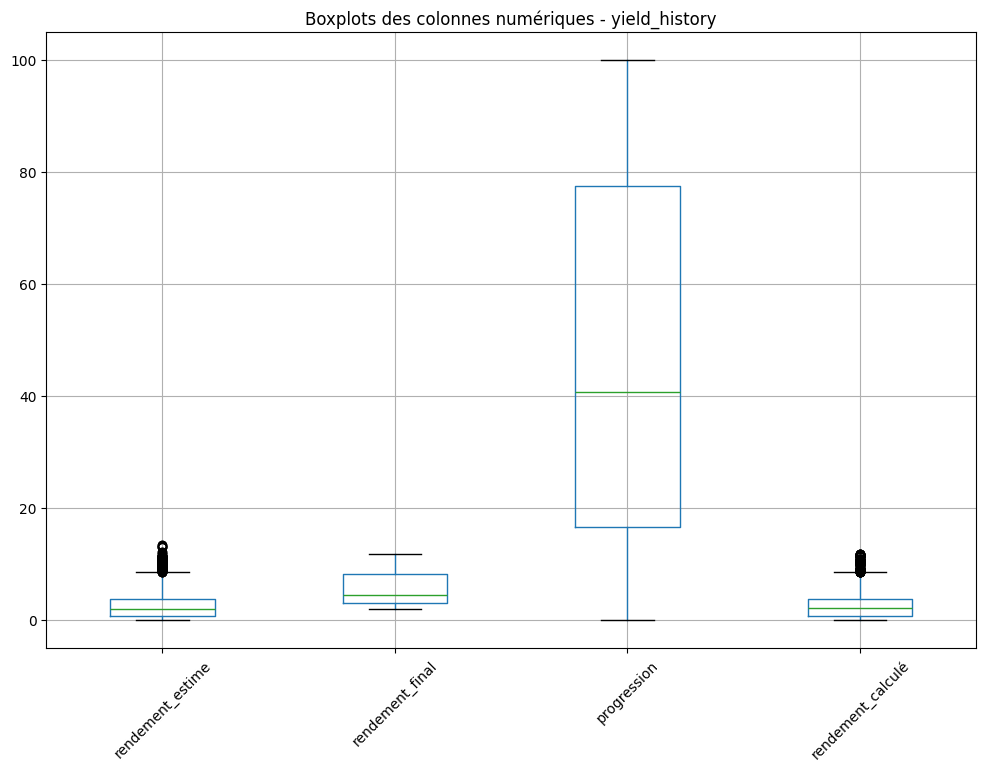


--- Graphiques de distribution ---


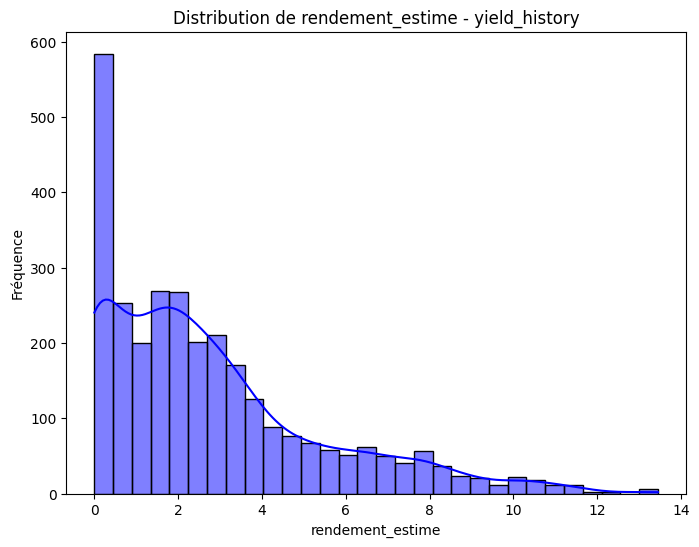

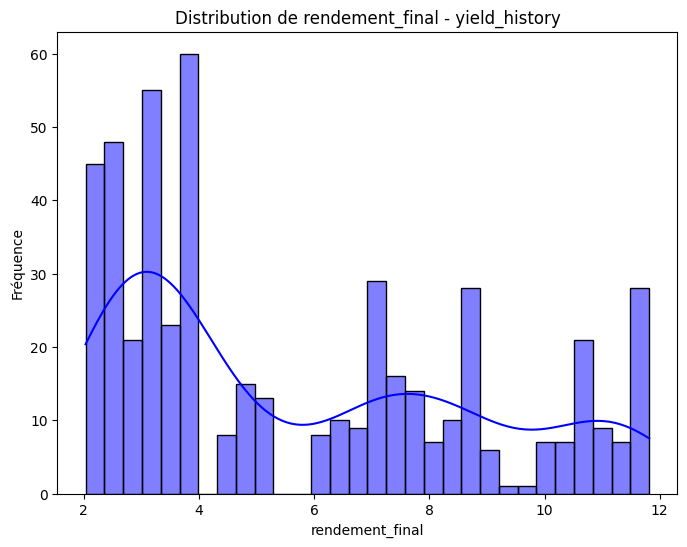

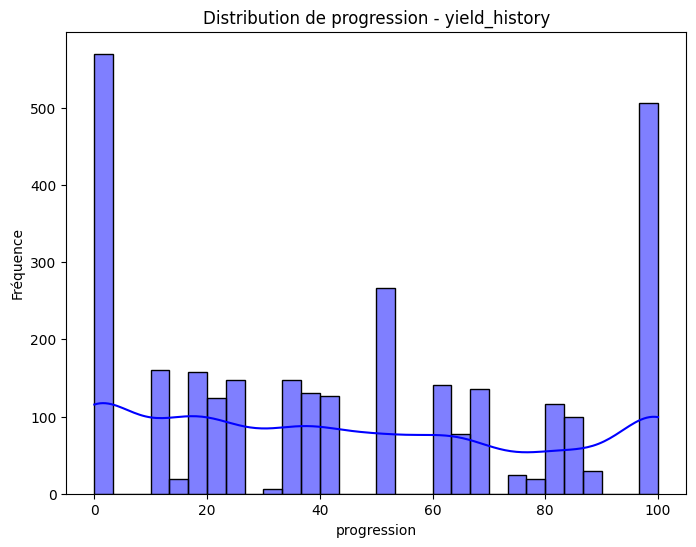

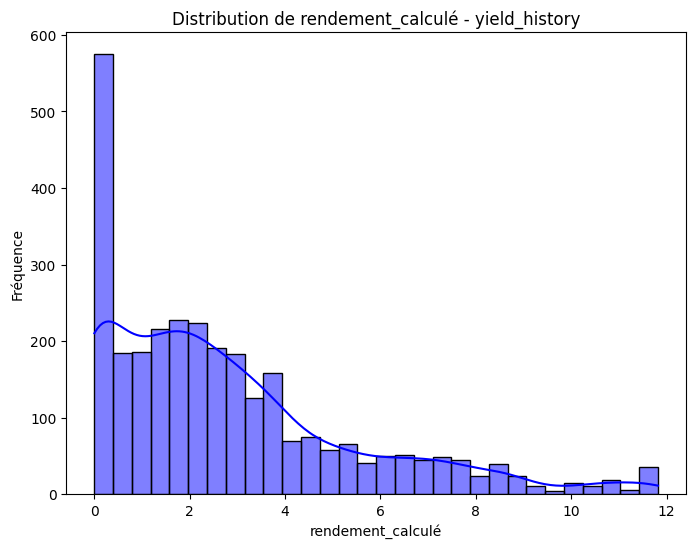


--- Matrice de corrélation ---


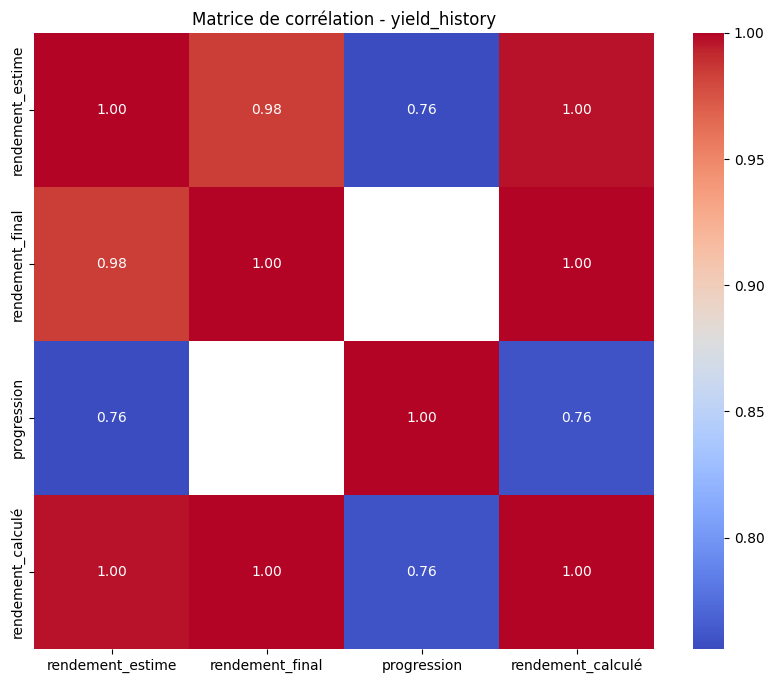


=== Analyse pour weather_data ===

--- Description des données ---
        temperature      humidite  precipitation  rayonnement_solaire  \
count  43848.000000  43848.000000   43848.000000         43848.000000   
mean      14.986754     88.191666       0.201446           189.355970   
std        7.972472      7.090408       0.871931           249.322674   
min       -2.330000     59.800000       0.000000             0.000000   
25%        8.700000     83.150000       0.000000             0.000000   
50%       14.970000     90.050000       0.000000             0.000000   
75%       21.250000     95.000000       0.000000           353.540000   
max       33.250000     95.000000      15.310000          1041.010000   

       vitesse_vent  direction_vent  
count  43848.000000    43848.000000  
mean       5.017230      180.251311  
std        1.978351      104.047102  
min        0.000000        0.000000  
25%        3.700000       89.500000  
50%        5.000000      180.200000  
75%     

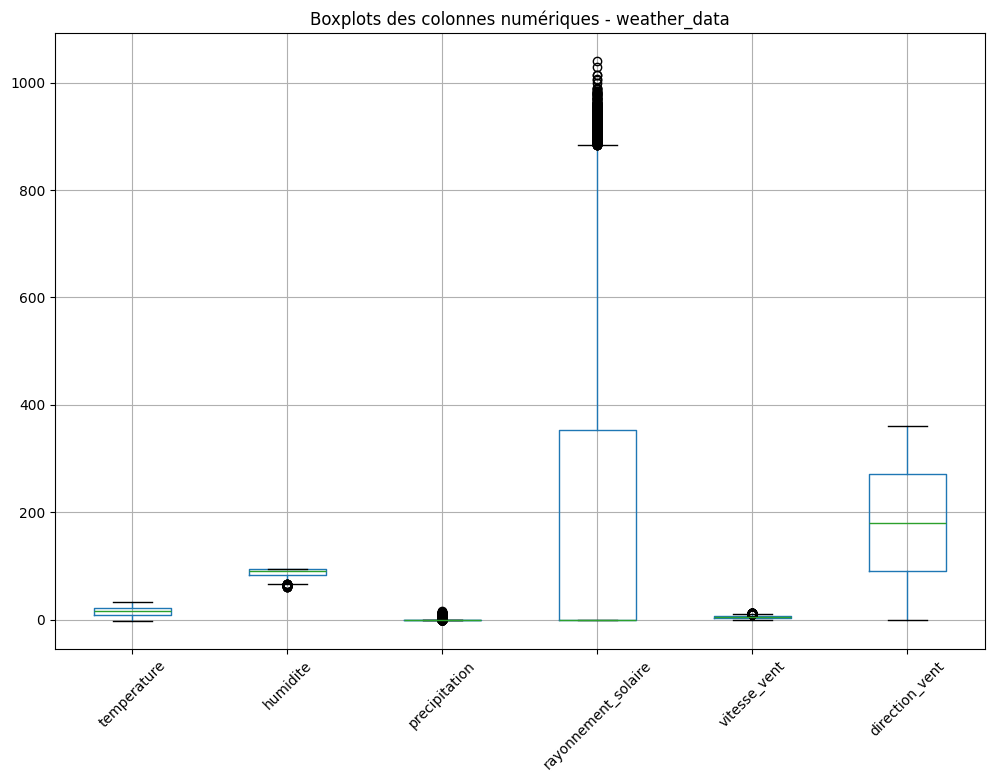


--- Graphiques de distribution ---


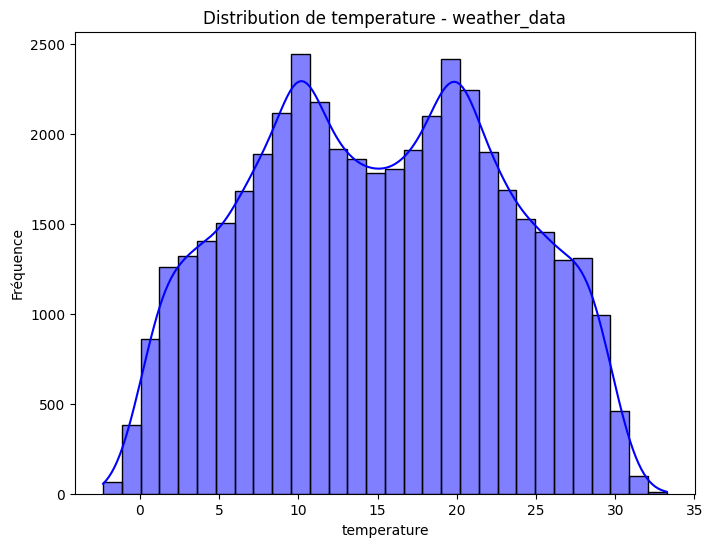

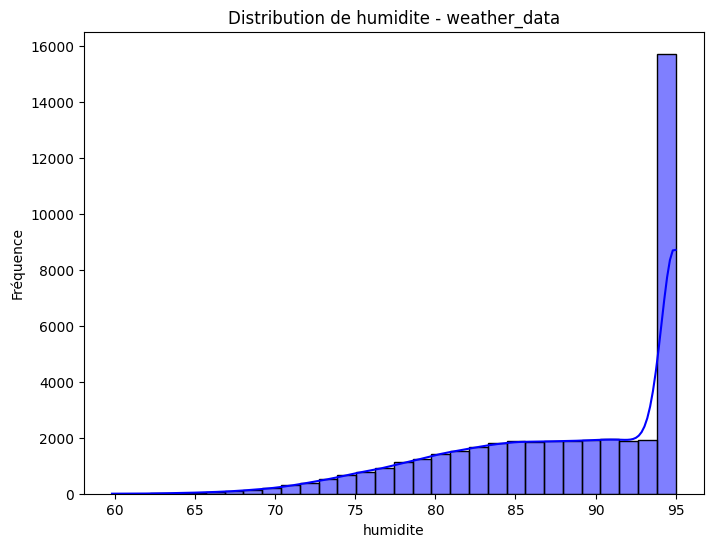

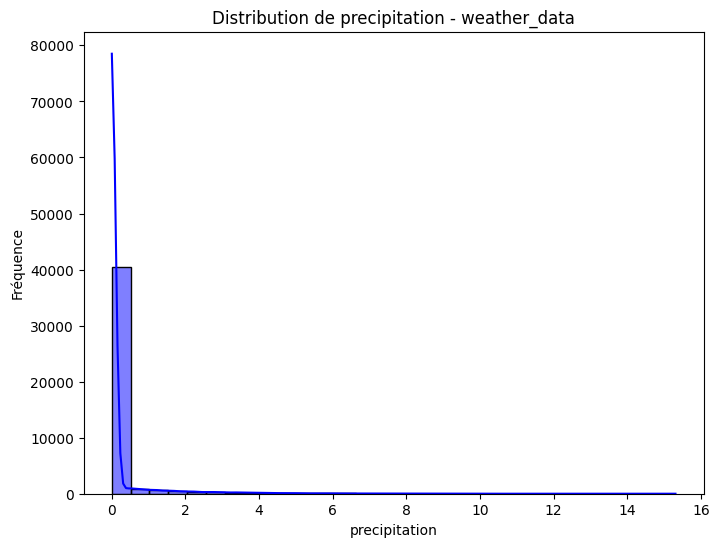

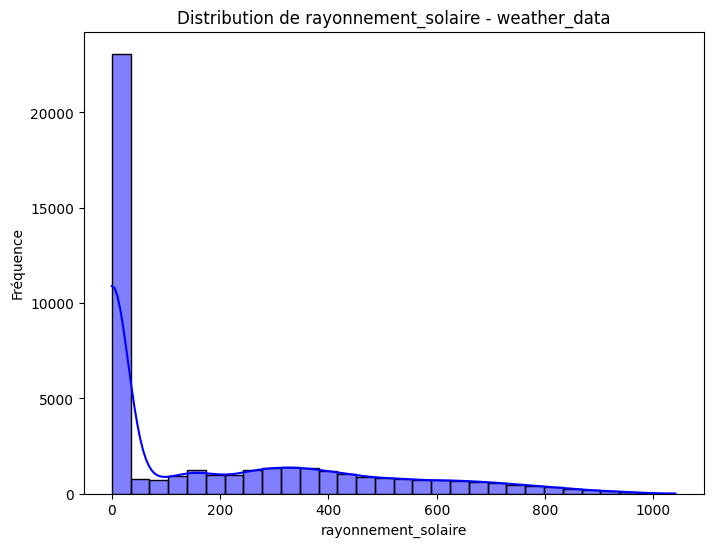

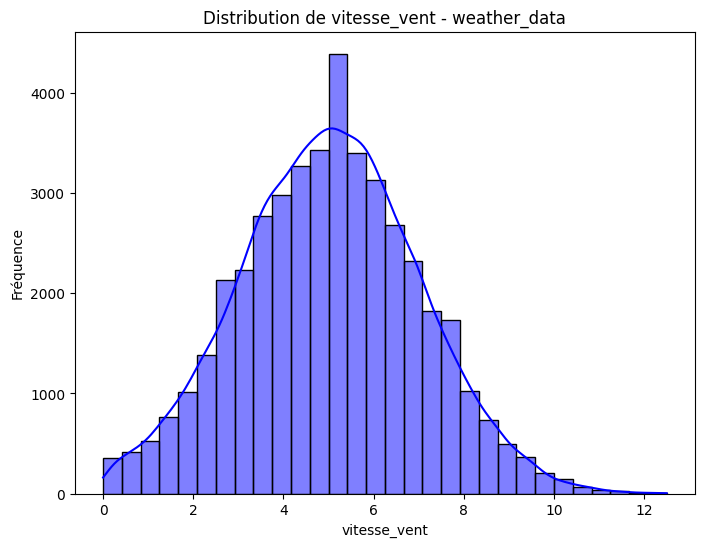

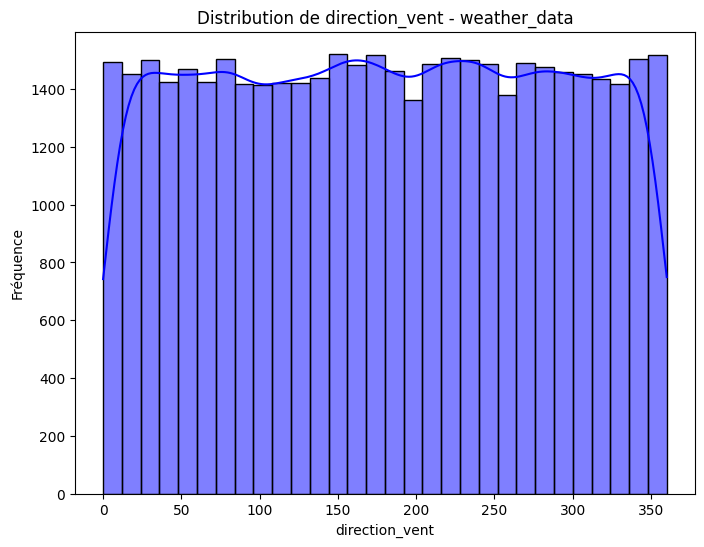


--- Matrice de corrélation ---


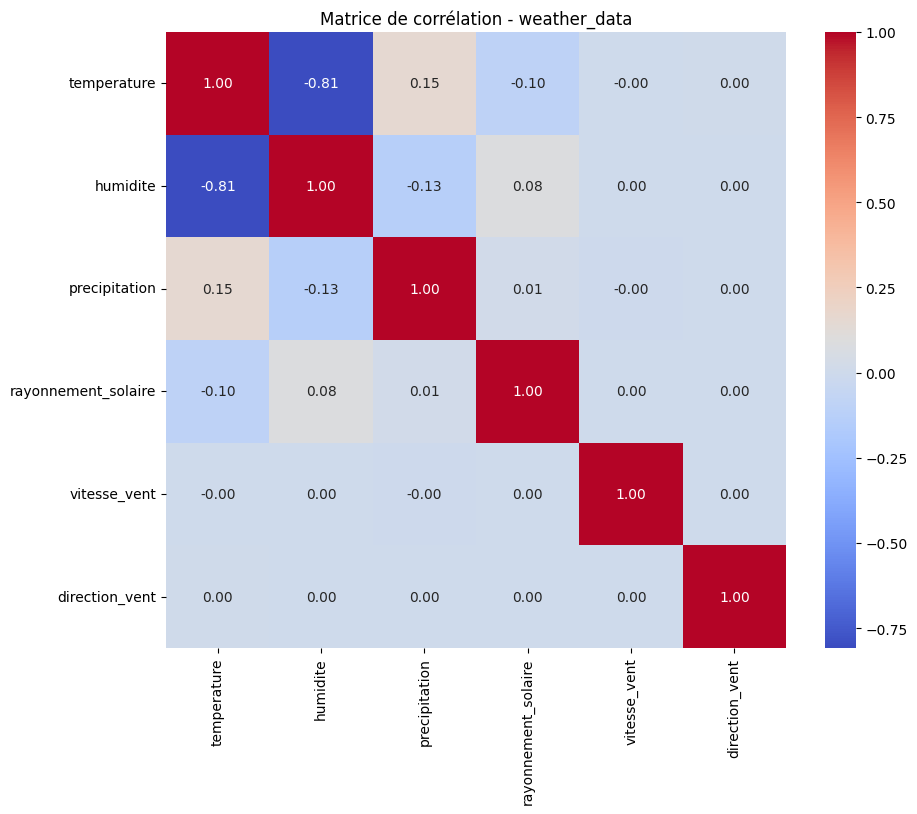


=== Analyse pour monitoring_data ===

--- Description des données ---
           latitude     longitude          ndvi           lai  \
count  91350.000000  91350.000000  91350.000000  91350.000000   
mean      33.871293     -5.543901      0.485825      1.992503   
std        0.034216      0.027453      0.183708      1.492464   
min       33.842650     -5.593781      0.100000      0.100000   
25%       33.850267     -5.551448      0.345000      0.580000   
50%       33.854988     -5.539713      0.458000      1.680000   
75%       33.859141     -5.517606      0.606000      3.070000   
max       33.937407     -5.508548      1.000000      6.550000   

       stress_hydrique  biomasse_estimee  
count     91350.000000      91350.000000  
mean          0.078592         12.257617  
std           0.068074         12.776887  
min           0.000000          0.000000  
25%           0.032000          2.040000  
50%           0.059000          7.670000  
75%           0.104000         18.280000  

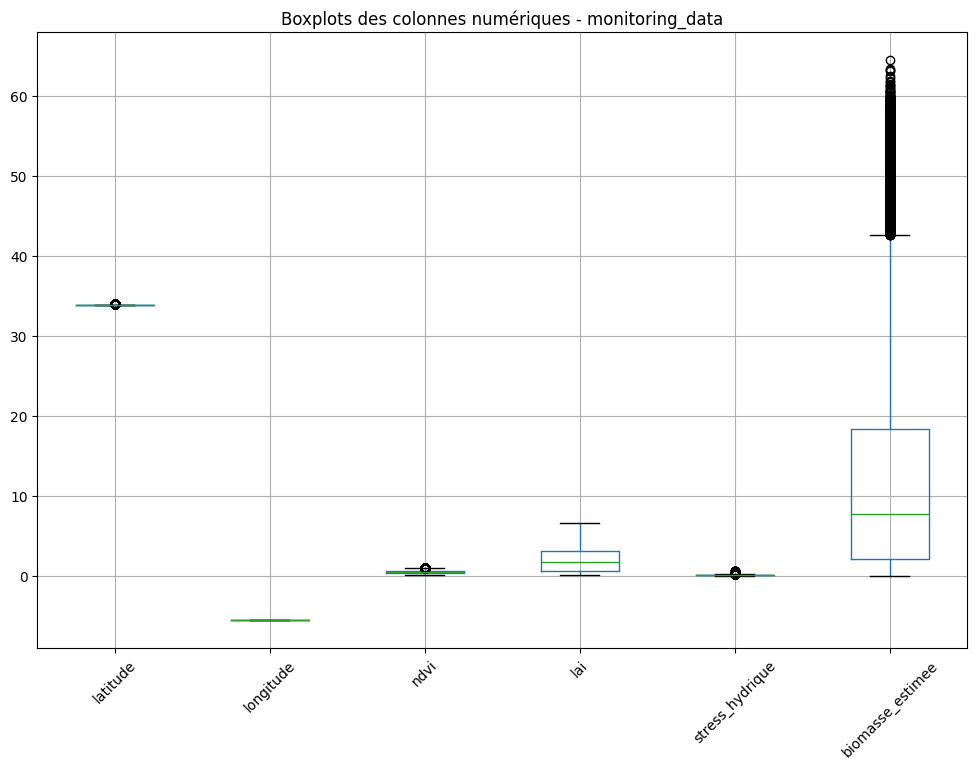


--- Graphiques de distribution ---


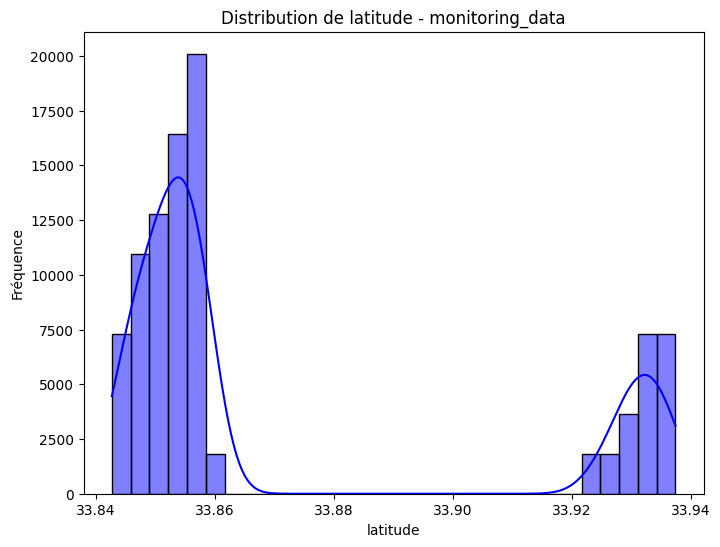

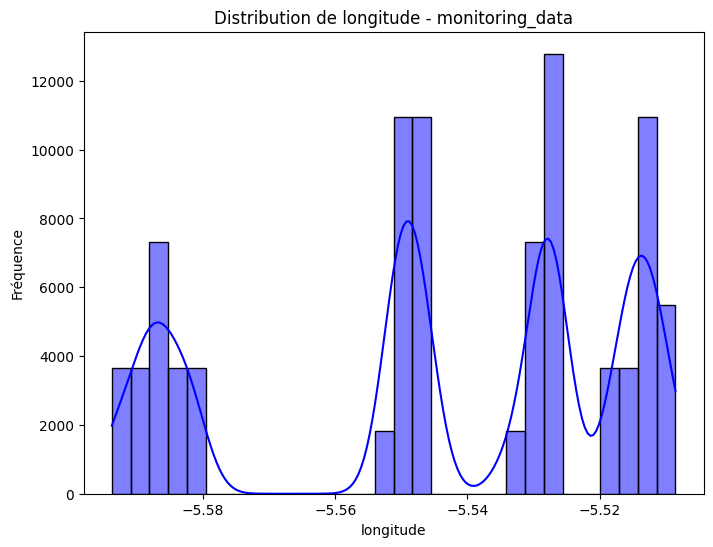

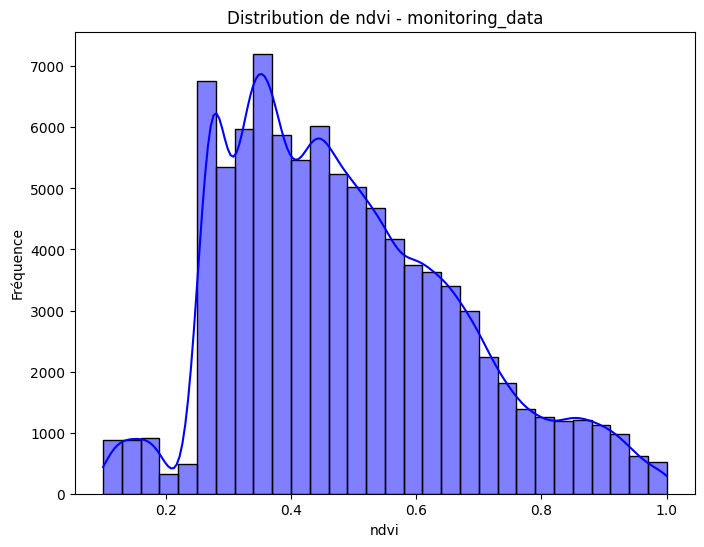

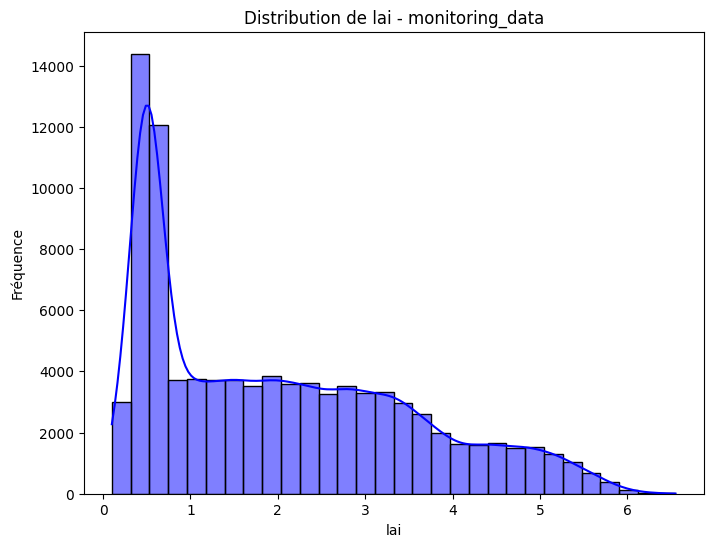

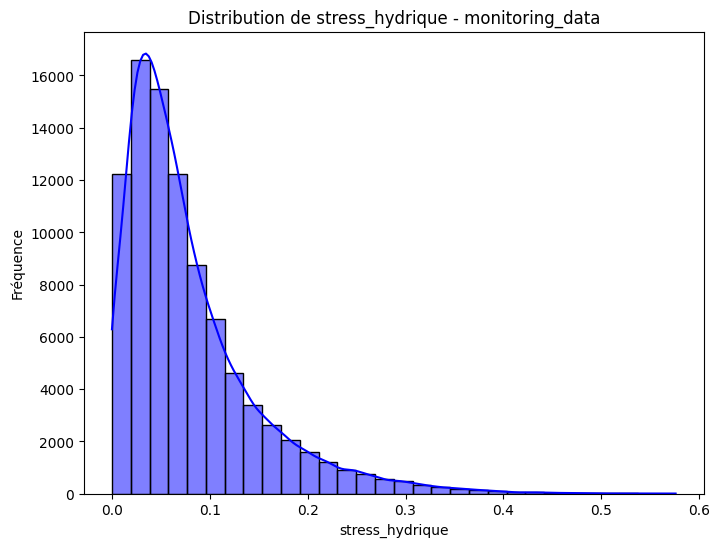

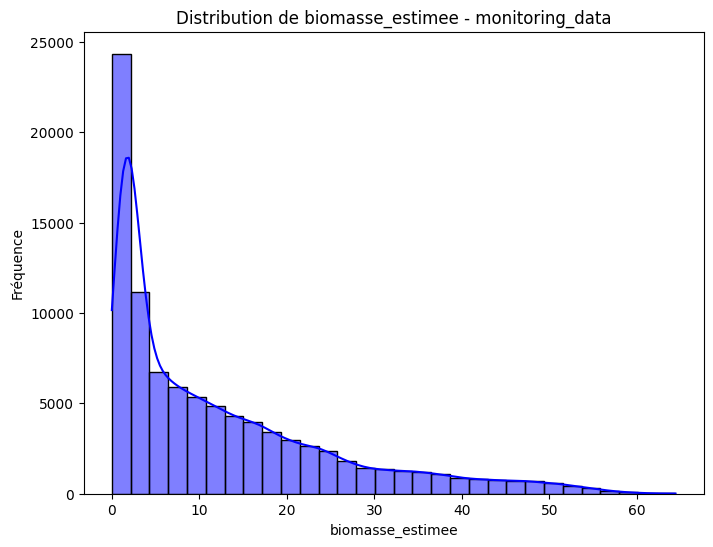


--- Matrice de corrélation ---


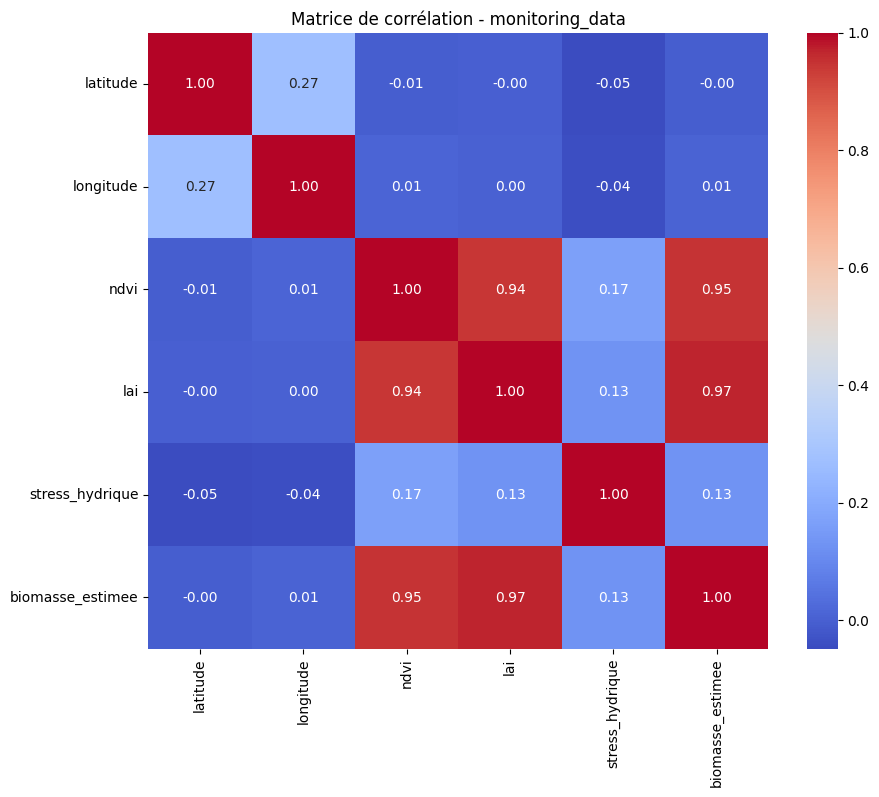


=== Analyse pour soil_data ===

--- Description des données ---
        latitude  longitude  surface_ha  capacite_retention_eau         ph  \
count  50.000000  50.000000   50.000000               50.000000  50.000000   
mean   33.871293  -5.543901   12.800600                0.716400   7.100000   
std     0.034563   0.027731    4.292493                0.148155   0.543233   
min    33.842650  -5.593781    5.070000                0.410000   6.000000   
25%    33.850452  -5.551373    9.045000                0.560000   6.700000   
50%    33.854988  -5.539713   13.705000                0.765000   7.150000   
75%    33.858922  -5.519616   16.090000                0.830000   7.500000   
max    33.937407  -5.508548   19.720000                0.890000   8.000000   

       matiere_organique      azote  phosphore   potassium  
count          50.000000  50.000000  50.000000   50.000000  
mean            3.204200   0.204120  40.030000  251.808000  
std             0.669036   0.041551  10.690588   

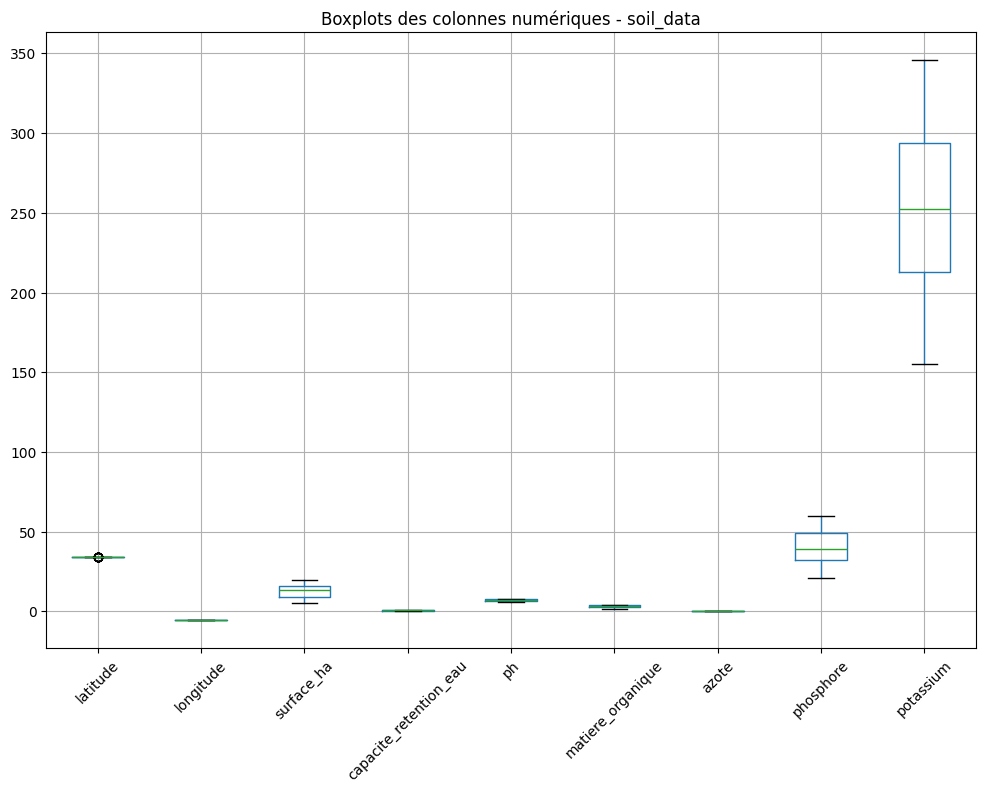


--- Graphiques de distribution ---


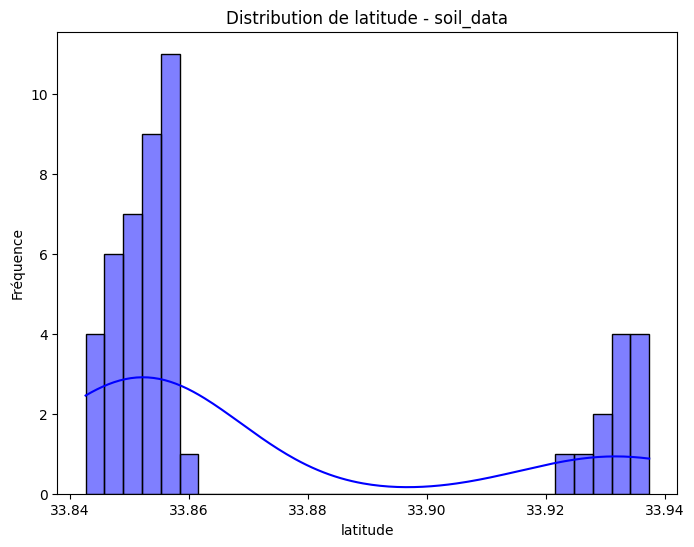

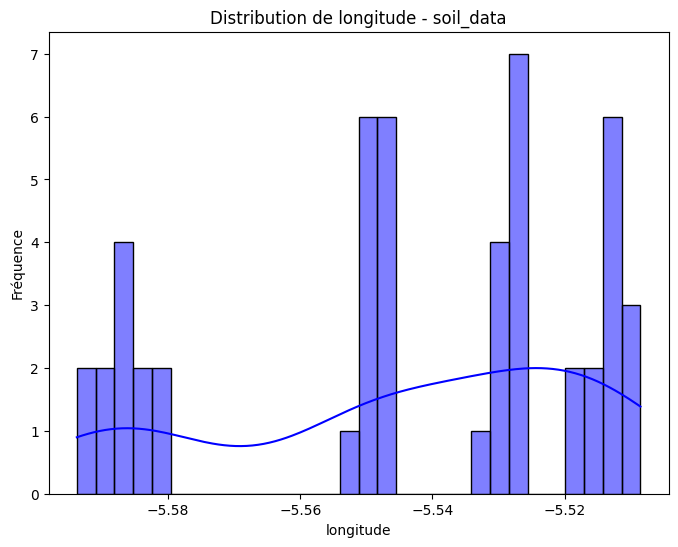

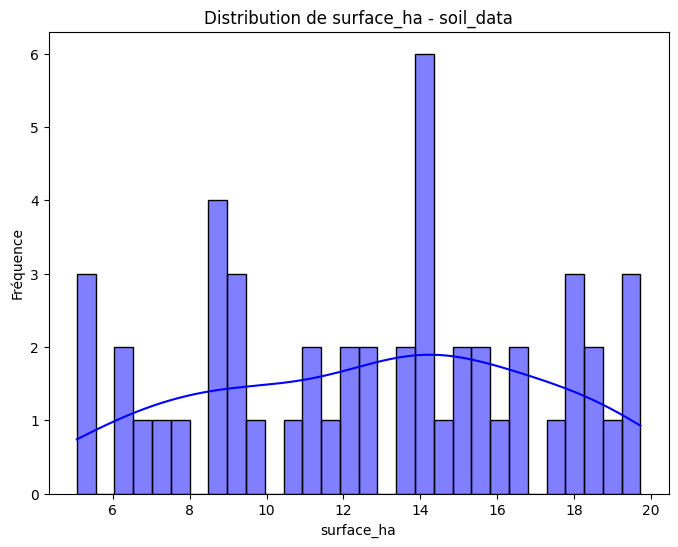

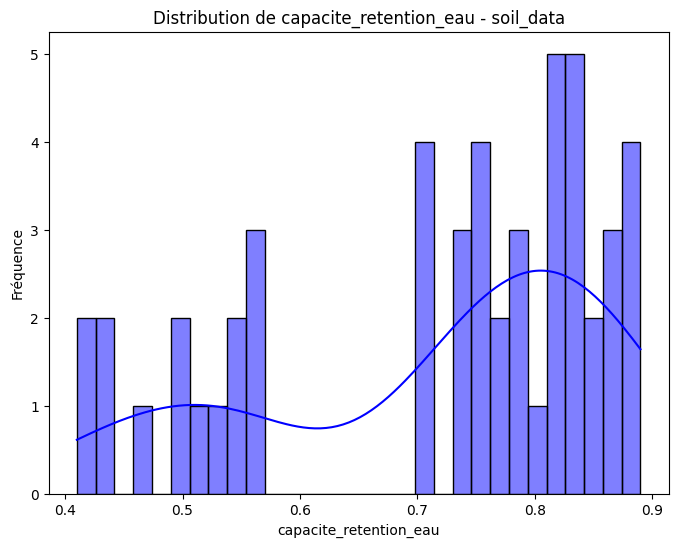

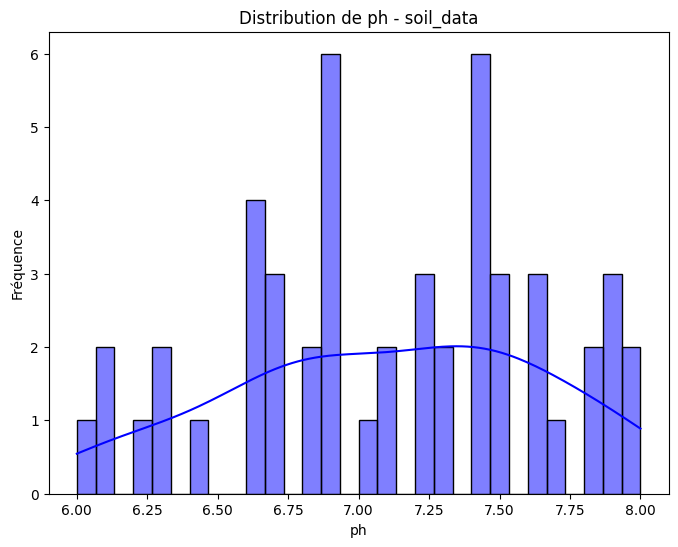

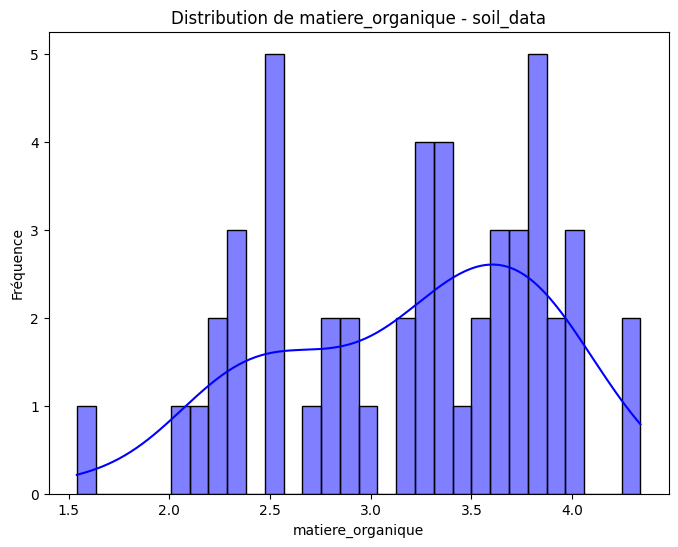

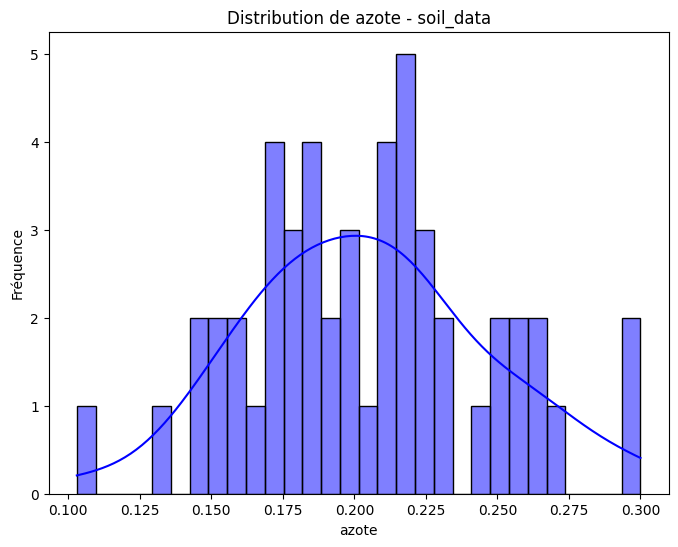

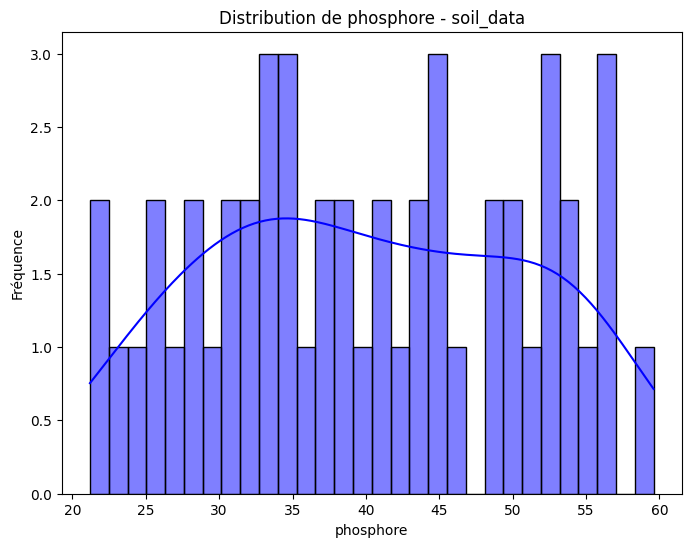

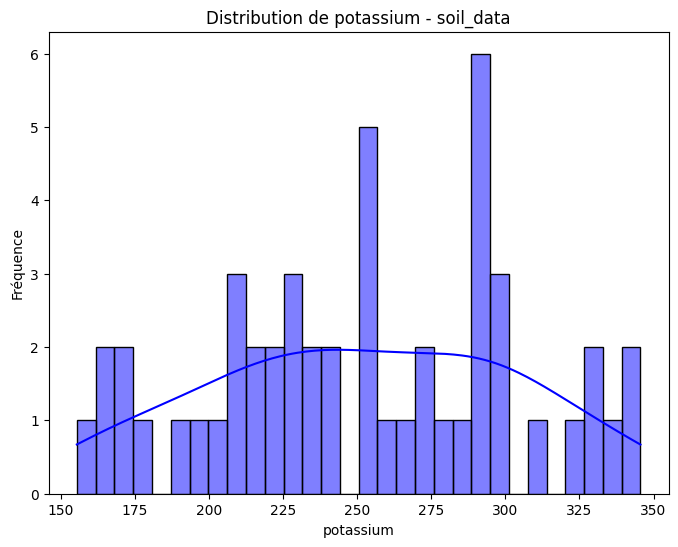


--- Matrice de corrélation ---


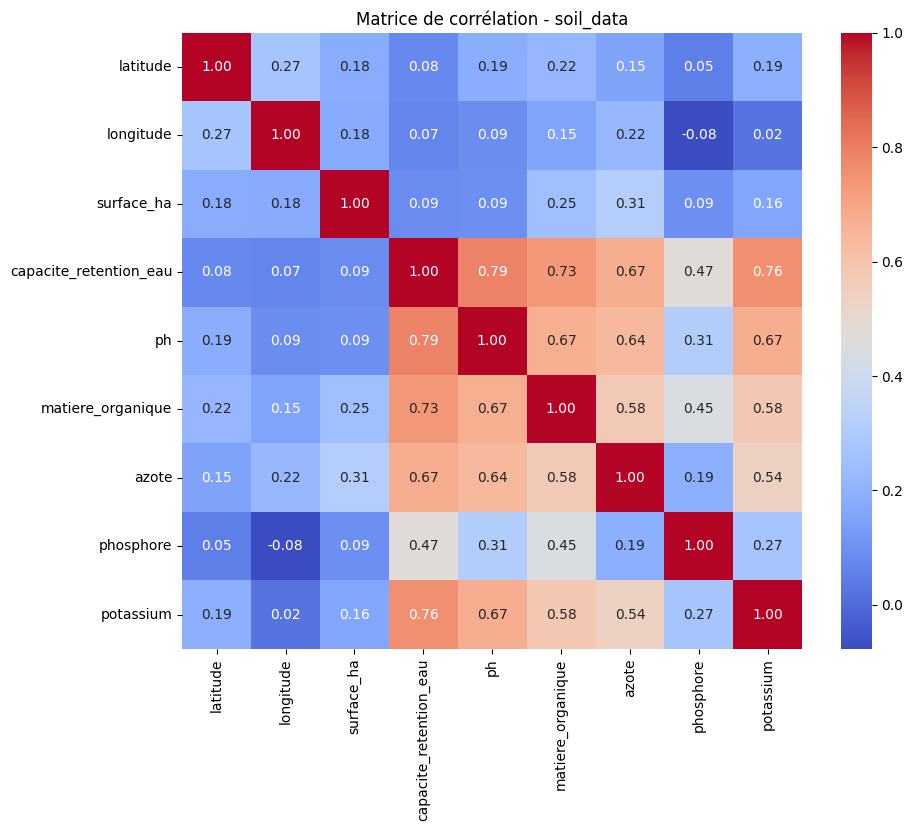

In [17]:
# Fonction pour afficher les valeurs négatives, les valeurs manquantes, describe(), les boxplots, les distributions et les matrices de corrélation
def analyze_and_visualize(df_dict):
    for name, df in df_dict.items():
        print(f"\n=== Analyse pour {name} ===")

        # Afficher le describe
        print("\n--- Description des données ---")
        print(df.describe())

        # Trouver et afficher les valeurs négatives
        print("\n--- Valeurs négatives ---")
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        negative_values = df[numeric_cols][df[numeric_cols] < 0].dropna(how='all')
        if not negative_values.empty:
            print(negative_values)
        else:
            print("Pas de valeurs négatives trouvées.")

        # Trouver et afficher les valeurs manquantes
        print("\n--- Valeurs manquantes ---")
        missing_values = df.isnull().sum()
        print(missing_values[missing_values > 0])

        # Générer un boxplot pour chaque colonne numérique
        print("\n--- Génération des boxplots ---")
        if not numeric_cols.empty:
            df[numeric_cols].boxplot(figsize=(12, 8))
            plt.title(f"Boxplots des colonnes numériques - {name}")
            plt.xticks(rotation=45)
            plt.show()
        else:
            print("Aucune colonne numérique pour générer des boxplots.")

        # Générer les graphiques de distribution
        print("\n--- Graphiques de distribution ---")
        for col in numeric_cols:
            plt.figure(figsize=(8, 6))
            sns.histplot(df[col].dropna(), kde=True, bins=30, color='blue')
            plt.title(f"Distribution de {col} - {name}")
            plt.xlabel(col)
            plt.ylabel("Fréquence")
            plt.show()

        # Générer une matrice de corrélation
        print("\n--- Matrice de corrélation ---")
        if len(numeric_cols) > 1:
            plt.figure(figsize=(10, 8))
            correlation_matrix = df[numeric_cols].corr()
            sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
            plt.title(f"Matrice de corrélation - {name}")
            plt.show()
        else:
            print("Pas assez de colonnes numériques pour générer une matrice de corrélation.")

# Analyser et visualiser tous les fichiers
analyze_and_visualize(dataframes)

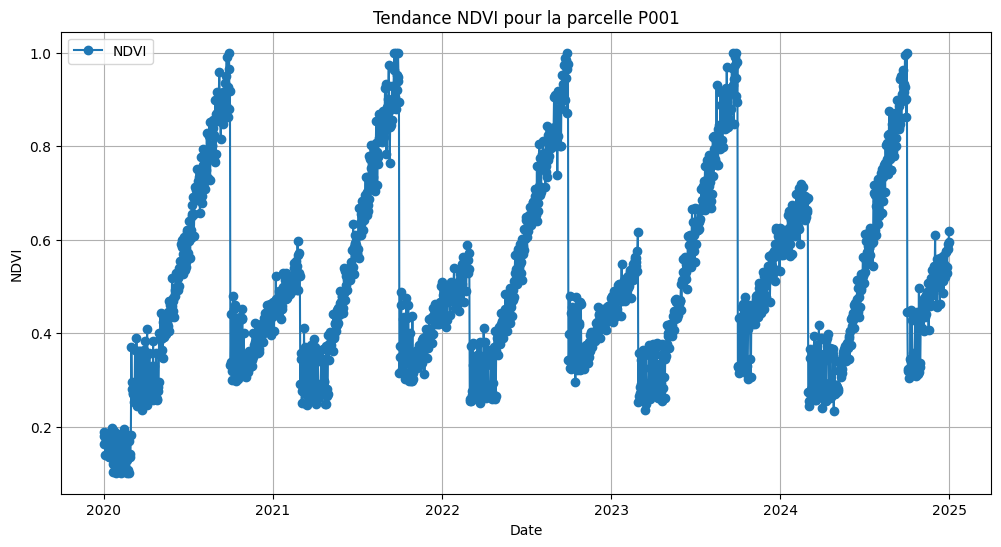

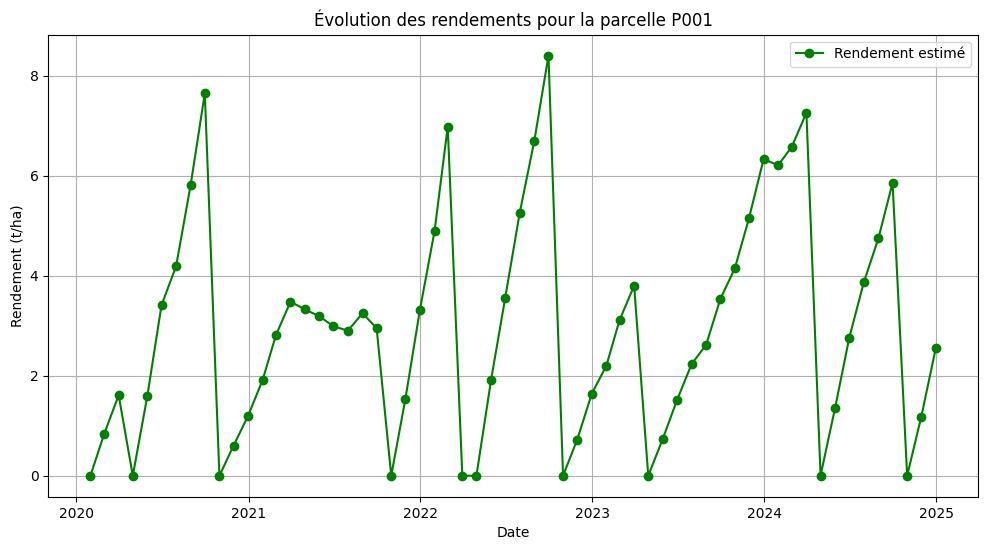

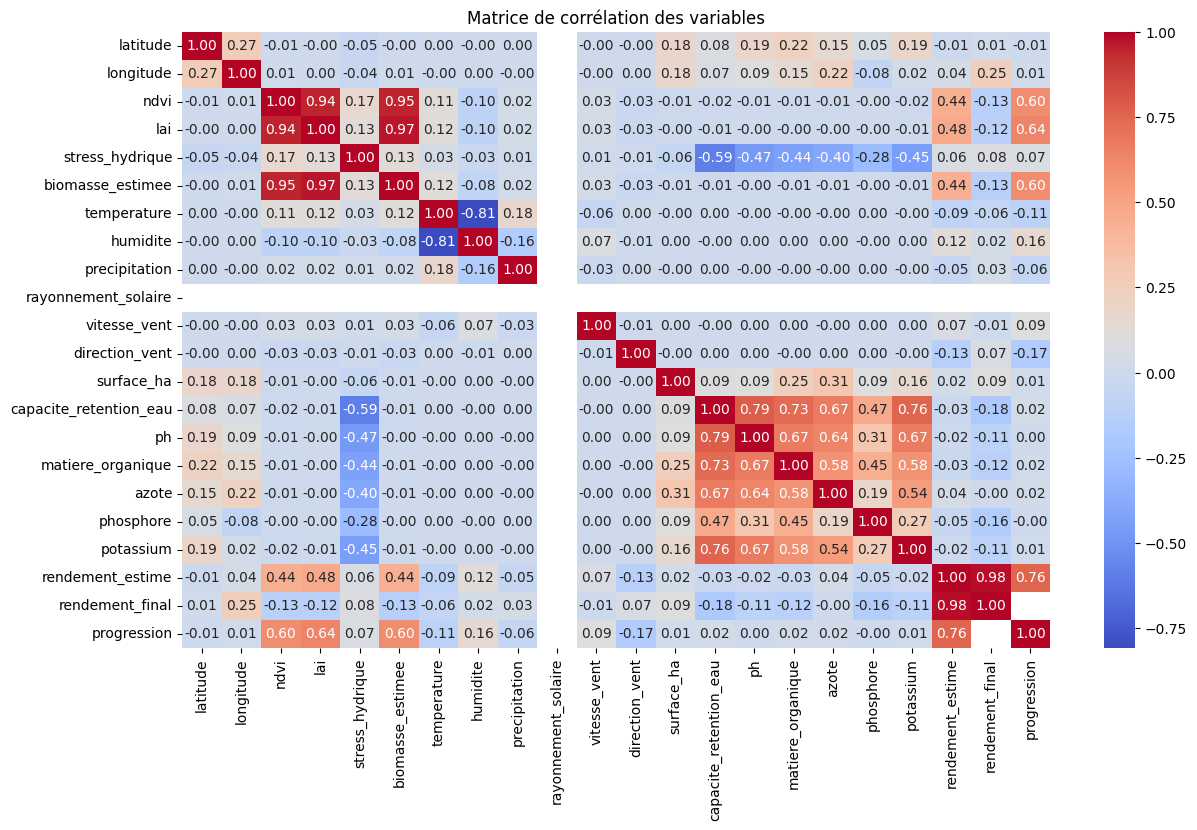

Aucune donnée d'indice de risque disponible.


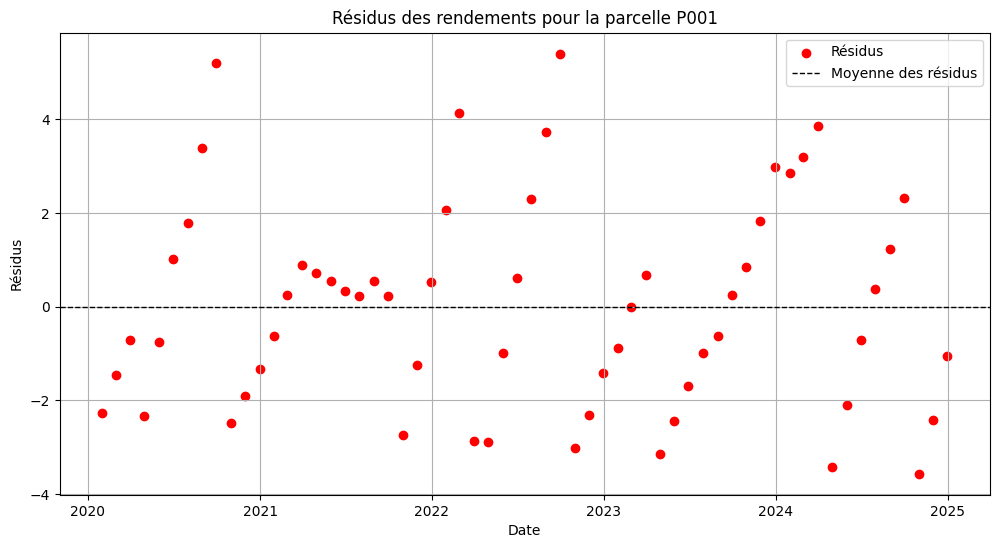

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime


# Charger les données préparées
features_path = "../data/features_merge.csv"
monitoring_path = "../data/monitoring_cultures.csv"
weather_path = "../data/meteo_detaillee.csv"
yield_history_path = "../data/historique_rendements.csv"

try:
    features = pd.read_csv(features_path, parse_dates=["date"])
    monitoring_data = pd.read_csv(monitoring_path, parse_dates=["date"])
    weather_data = pd.read_csv(weather_path, parse_dates=["date"])
    yield_history = pd.read_csv(yield_history_path, parse_dates=["date"])
except FileNotFoundError as e:
    print(f"Erreur de chargement des fichiers : {e}")

# Visualisation 1 : Tendances NDVI par parcelle
parcelle_id = "P001"
parcelle_data = features[features["parcelle_id"] == parcelle_id]

if not parcelle_data.empty:
    plt.figure(figsize=(12, 6))
    plt.plot(parcelle_data["date"], parcelle_data["ndvi"], label="NDVI", marker="o")
    plt.title(f"Tendance NDVI pour la parcelle {parcelle_id}")
    plt.xlabel("Date")
    plt.ylabel("NDVI")
    plt.grid()
    plt.legend()
    plt.show()
else:
    print(f"Aucune donnée pour la parcelle {parcelle_id}")

# Visualisation 2 : Analyse des rendements
if not yield_history.empty:
    yield_data = yield_history[yield_history["parcelle_id"] == parcelle_id]

    if not yield_data.empty:
        plt.figure(figsize=(12, 6))
        plt.plot(yield_data["date"], yield_data["rendement_estime"], label="Rendement estimé", marker="o", color="green")
        plt.title(f"Évolution des rendements pour la parcelle {parcelle_id}")
        plt.xlabel("Date")
        plt.ylabel("Rendement (t/ha)")
        plt.grid()
        plt.legend()
        plt.show()
    else:
        print(f"Aucune donnée de rendement pour la parcelle {parcelle_id}")

# Visualisation 3 : Corrélation entre variables
numeric_cols = features.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation des variables")
plt.show()

# Visualisation 4 : Distribution des indices de risque
if "risk_index" in features.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(features["risk_index"], kde=True, bins=30, color="orange")
    plt.title("Distribution des indices de risque")
    plt.xlabel("Indice de risque")
    plt.ylabel("Densité")
    plt.grid()
    plt.show()
else:
    print("Aucune donnée d'indice de risque disponible.")

# Visualisation 5 : Résidus des rendements (analyse de tendance)
yield_data = yield_history[yield_history["parcelle_id"] == parcelle_id]
if not yield_data.empty:
    yield_data = yield_data.dropna(subset=["rendement_estime"])
    yield_data = yield_data.sort_values(by="date")

    # Régression linéaire pour tendance
    dates_num = yield_data["date"].map(datetime.toordinal).values.reshape(-1, 1)
    yields = yield_data["rendement_estime"].values.reshape(-1, 1)
    reg_model = LinearRegression().fit(dates_num, yields)

    predicted = reg_model.predict(dates_num).flatten()
    resid = yield_data["rendement_estime"] - predicted

    plt.figure(figsize=(12, 6))
    plt.scatter(yield_data["date"], resid, color="red", label="Résidus")
    plt.axhline(0, color="black", linestyle="--", linewidth=1, label="Moyenne des résidus")
    plt.title(f"Résidus des rendements pour la parcelle {parcelle_id}")
    plt.xlabel("Date")
    plt.ylabel("Résidus")
    plt.grid()
    plt.legend()
    plt.show()
else:
    print(f"Aucune donnée de rendement pour analyser les résidus pour la parcelle {parcelle_id}.")
